In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('loan/loan.csv', low_memory=False)

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
#Shape of Dataset
df.shape

(39717, 111)

In [5]:
# Calculating missing values column wise
for i in df.columns:
    num_asterisks = 30 - len(i)
    print(f'{i} {"*" * num_asterisks} {df[i].isna().sum()}')


id **************************** 0
member_id ********************* 0
loan_amnt ********************* 0
funded_amnt ******************* 0
funded_amnt_inv *************** 0
term ************************** 0
int_rate ********************** 0
installment ******************* 0
grade ************************* 0
sub_grade ********************* 0
emp_title ********************* 2459
emp_length ******************** 1075
home_ownership **************** 0
annual_inc ******************** 0
verification_status *********** 0
issue_d *********************** 0
loan_status ******************* 0
pymnt_plan ******************** 0
url *************************** 0
desc ************************** 12942
purpose *********************** 0
title ************************* 11
zip_code ********************** 0
addr_state ******************** 0
dti *************************** 0
delinq_2yrs ******************* 0
earliest_cr_line ************** 0
inq_last_6mths **************** 0
mths_since_last_delinq ******** 25682

In [6]:
# Droping missing values whose frequency is greater than 50%
for i in df.columns:
    if df[i].isna().sum() > 20000:
        print(df[i].isna().sum())
        print(f"Dropping column '{i}' with {df[i].isna().sum()} missing values.")
        df.drop(i, axis=1, inplace=True)


25682
Dropping column 'mths_since_last_delinq' with 25682 missing values.
36931
Dropping column 'mths_since_last_record' with 36931 missing values.
38577
Dropping column 'next_pymnt_d' with 38577 missing values.
39717
Dropping column 'mths_since_last_major_derog' with 39717 missing values.
39717
Dropping column 'annual_inc_joint' with 39717 missing values.
39717
Dropping column 'dti_joint' with 39717 missing values.
39717
Dropping column 'verification_status_joint' with 39717 missing values.
39717
Dropping column 'tot_coll_amt' with 39717 missing values.
39717
Dropping column 'tot_cur_bal' with 39717 missing values.
39717
Dropping column 'open_acc_6m' with 39717 missing values.
39717
Dropping column 'open_il_6m' with 39717 missing values.
39717
Dropping column 'open_il_12m' with 39717 missing values.
39717
Dropping column 'open_il_24m' with 39717 missing values.
39717
Dropping column 'mths_since_rcnt_il' with 39717 missing values.
39717
Dropping column 'total_bal_il' with 39717 missing

In [7]:
# Preprocessed Dataset Shape
df.shape

(39717, 54)

In [8]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [9]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

<Axes: >

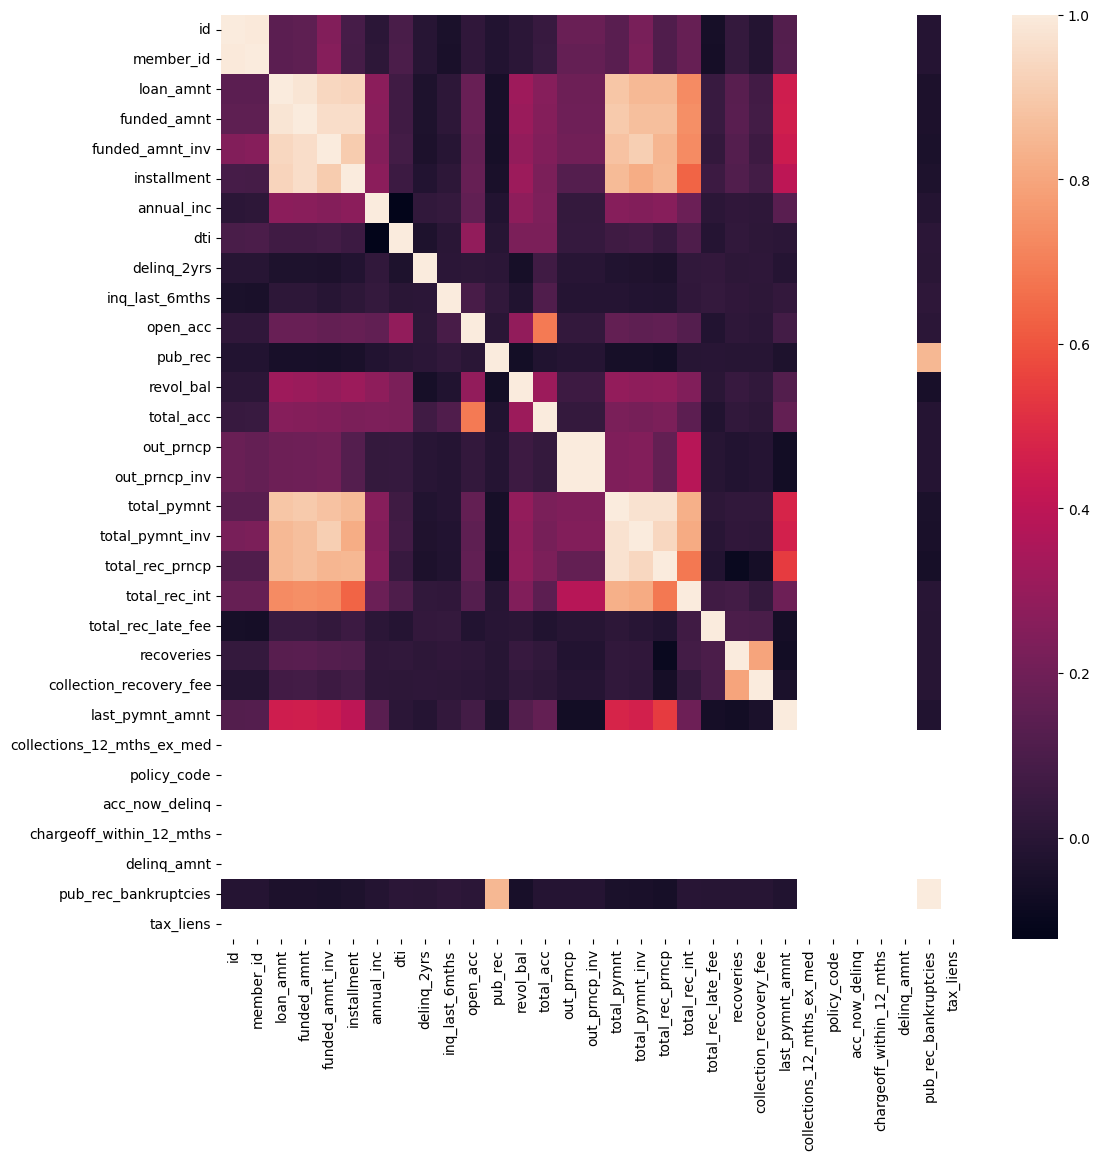

In [10]:
# Drawing Correlation matrix to know the correlation between columns
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(numeric_only=True))

In [11]:
# Checking Duplicated Values
df.duplicated().sum()

0

In [12]:
# Summary statistics
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [13]:
df.drop('desc', inplace=True, axis=1)

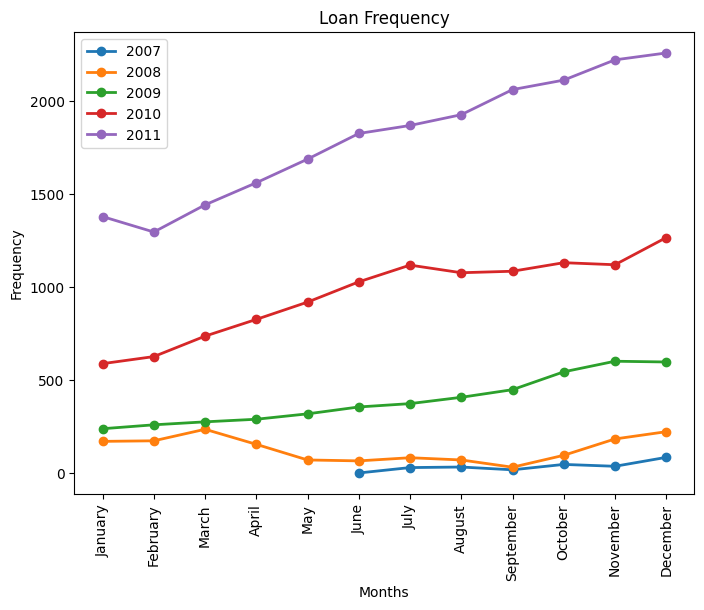

In [14]:
# Convert to date time object and extract month, year
import calendar
df['issue_d'] = pd.to_datetime(df['issue_d'], format="%b-%y")
df['month'] = df['issue_d'].dt.month
df['year'] = df['issue_d'].dt.year

# Get no of loans month and year wise
issue_freq_counts = df.groupby(['month', 'year']).size().unstack()

plt.figure(figsize=(8, 6))
month_labels = [calendar.month_name[bin] for bin in issue_freq_counts.index]
# Creating line chart, labelling using years
plt.plot(month_labels, issue_freq_counts.values, marker='o', linestyle='-', linewidth=2, label=issue_freq_counts.columns)

plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Loan Frequency')
plt.xticks(rotation=90)
plt.legend()

In [16]:
# For getting numeric and categorical columns
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

In [17]:
numeric_columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'month', 'year'],
      dtype='object')

In [18]:
categorical_columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

In [19]:
# Filling numeric columns with medium because it robust to outlier
for i in numeric_columns:
    df[i] = df[i].fillna(df[i].median())

In [20]:
# Filling categorical columns with mode
for i in categorical_columns:
    mode = df[i].mode()[0]
    df[i] = df[i].fillna(mode)

In [21]:
# Checking NA values are in dataset 
for i in df.columns:
    num_asterisks = 20 - len(i)
    print(f'{i} {"*" * num_asterisks} {df[i].isna().sum()}')

id ****************** 0
member_id *********** 0
loan_amnt *********** 0
funded_amnt ********* 0
funded_amnt_inv ***** 0
term **************** 0
int_rate ************ 0
installment ********* 0
grade *************** 0
sub_grade *********** 0
emp_title *********** 0
emp_length ********** 0
home_ownership ****** 0
annual_inc ********** 0
verification_status * 0
issue_d ************* 0
loan_status ********* 0
pymnt_plan ********** 0
url ***************** 0
purpose ************* 0
title *************** 0
zip_code ************ 0
addr_state ********** 0
dti ***************** 0
delinq_2yrs ********* 0
earliest_cr_line **** 0
inq_last_6mths ****** 0
open_acc ************ 0
pub_rec ************* 0
revol_bal *********** 0
revol_util ********** 0
total_acc *********** 0
initial_list_status * 0
out_prncp *********** 0
out_prncp_inv ******* 0
total_pymnt ********* 0
total_pymnt_inv ***** 0
total_rec_prncp ***** 0
total_rec_int ******* 0
total_rec_late_fee ** 0
recoveries ********** 0
collection_recov

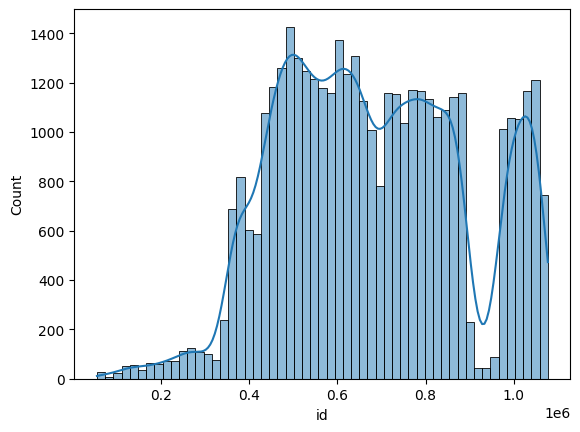

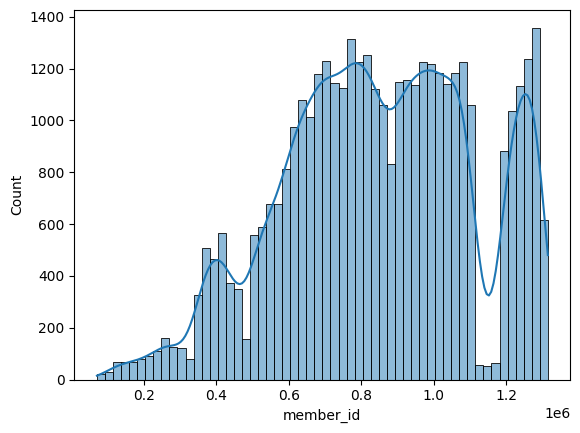

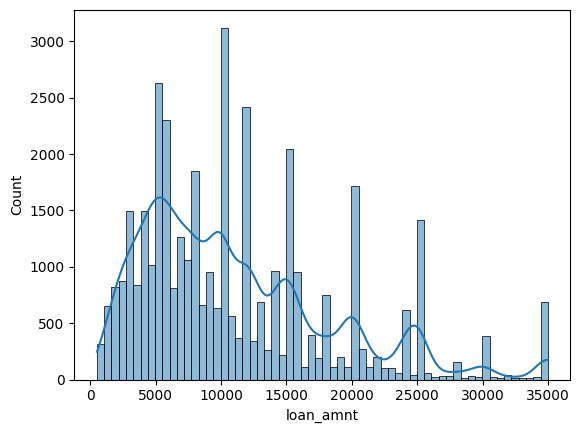

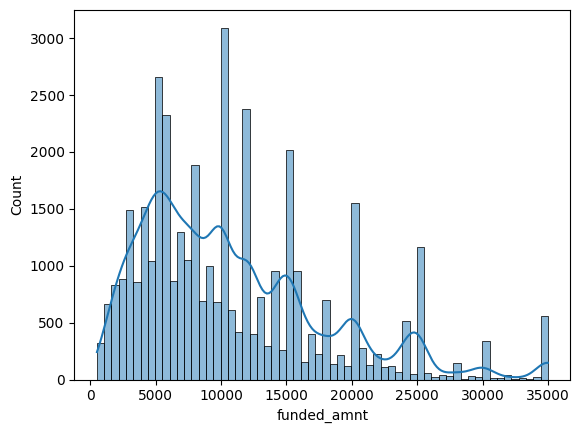

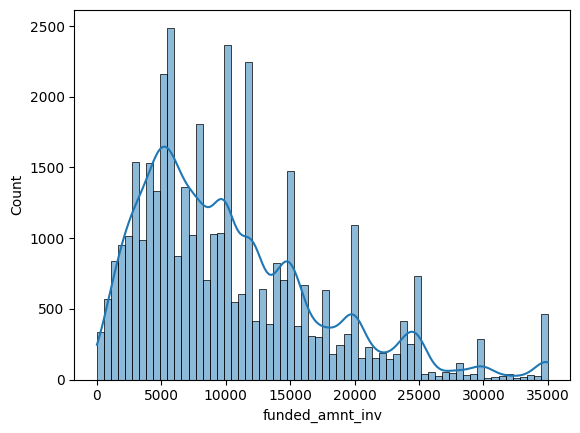

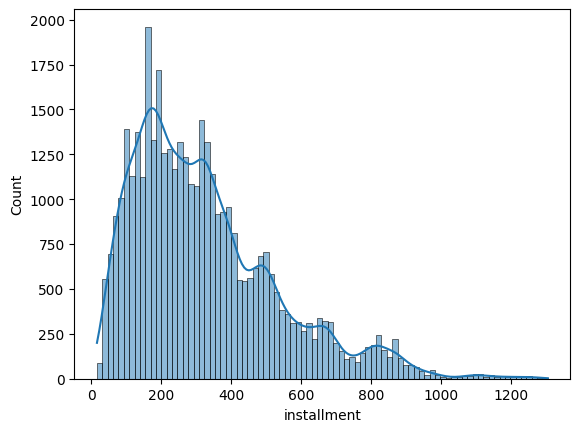

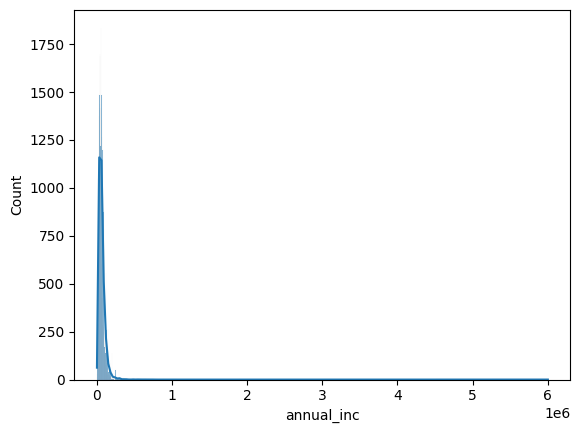

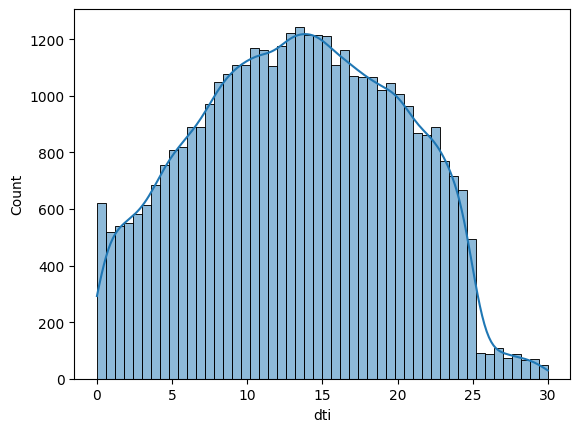

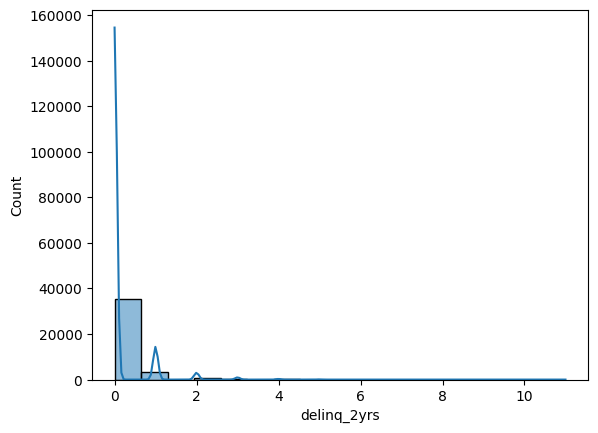

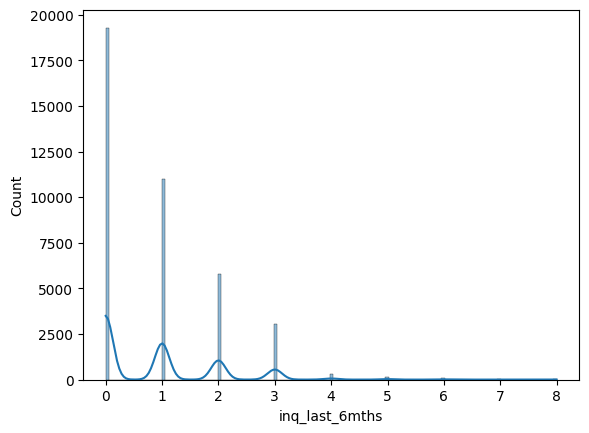

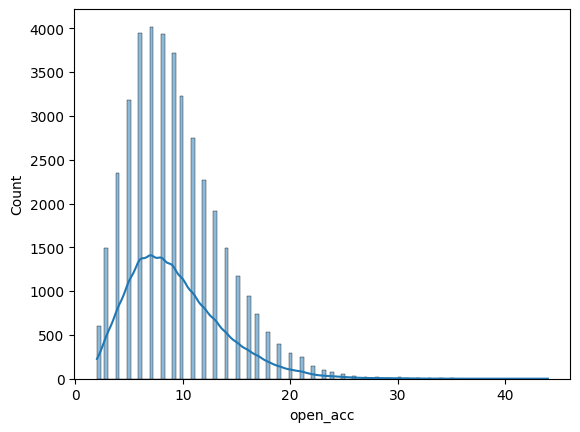

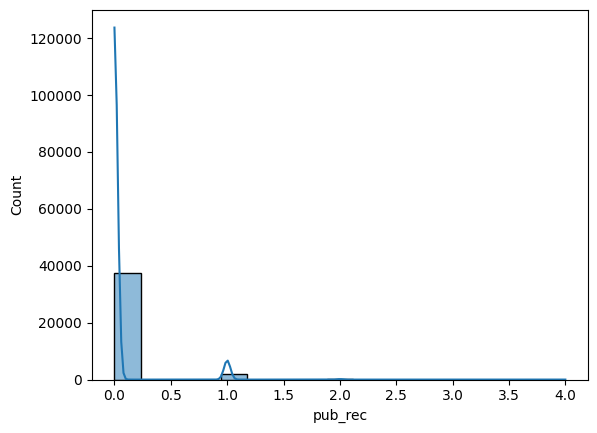

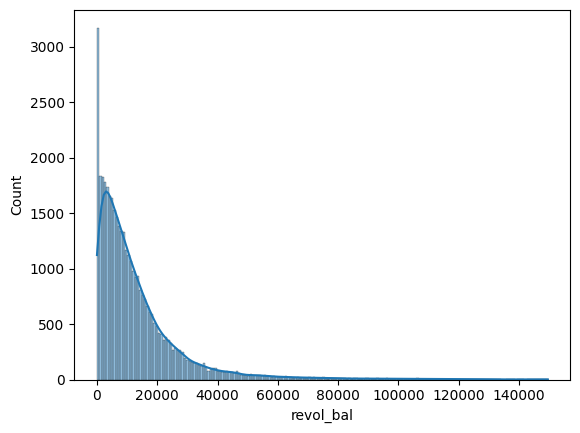

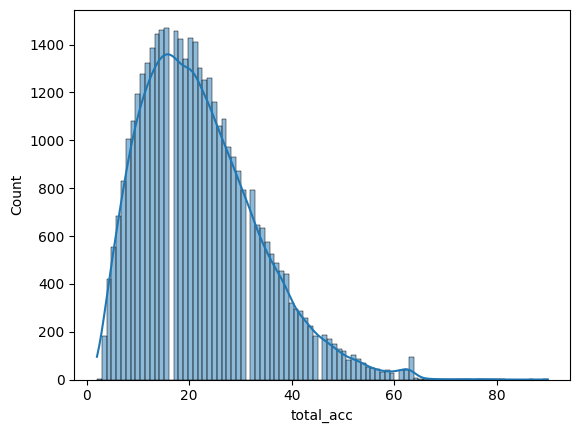

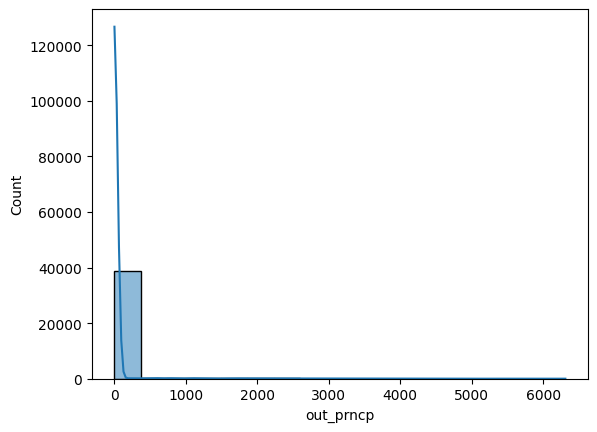

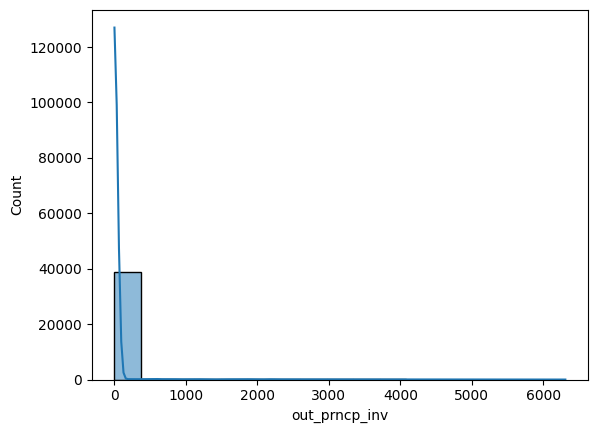

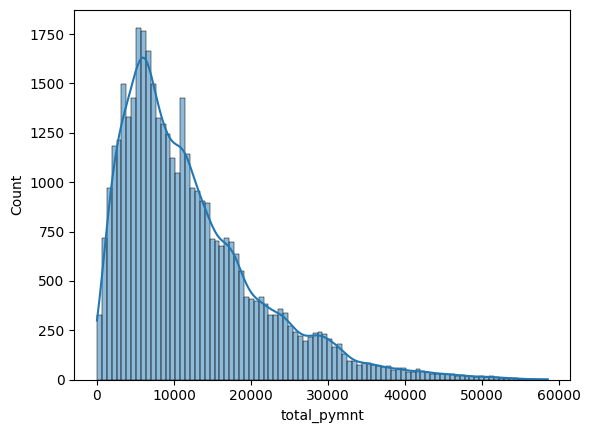

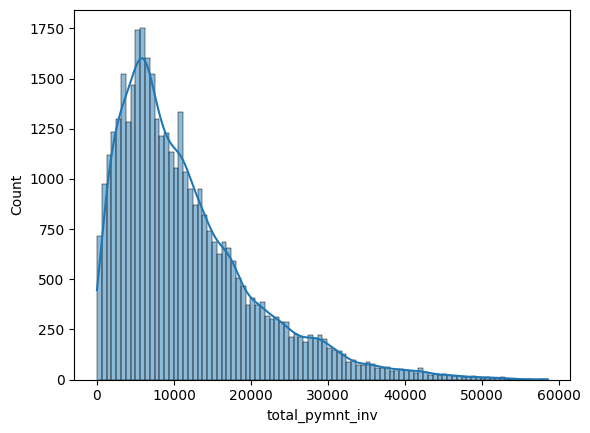

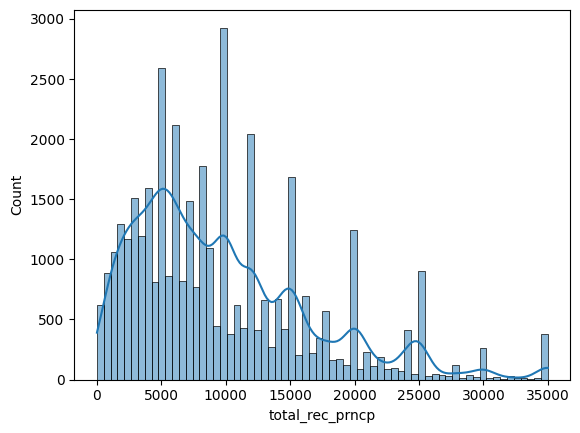

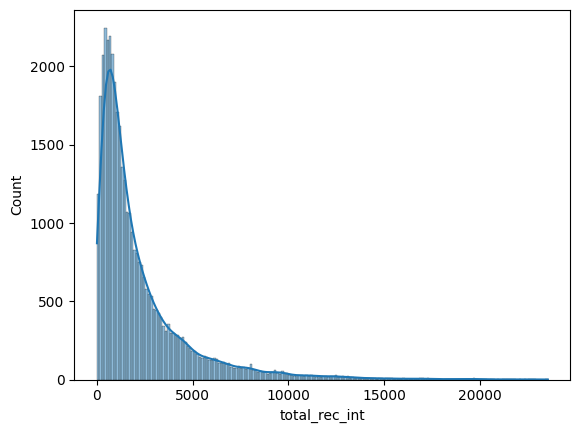

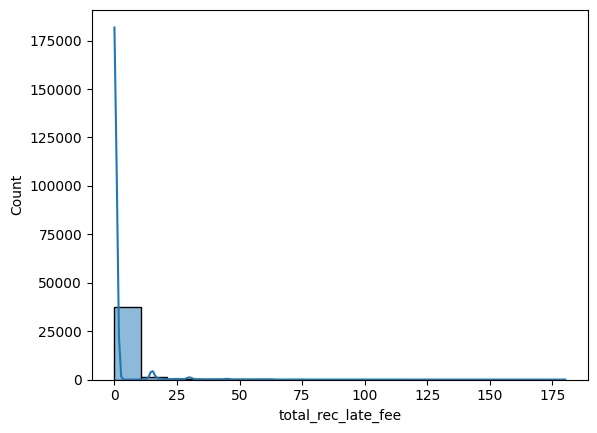

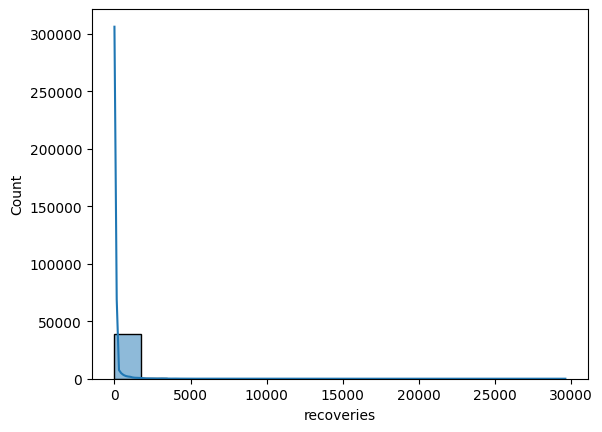

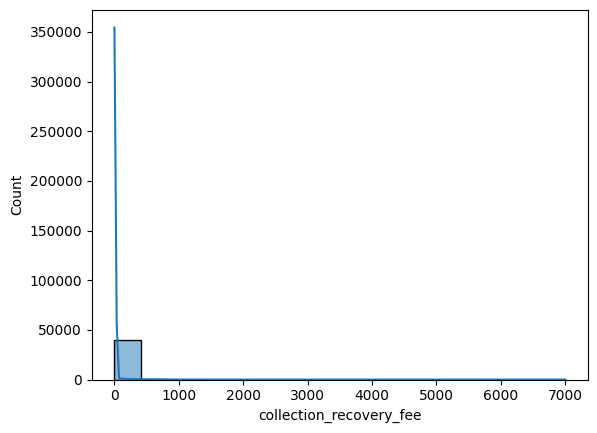

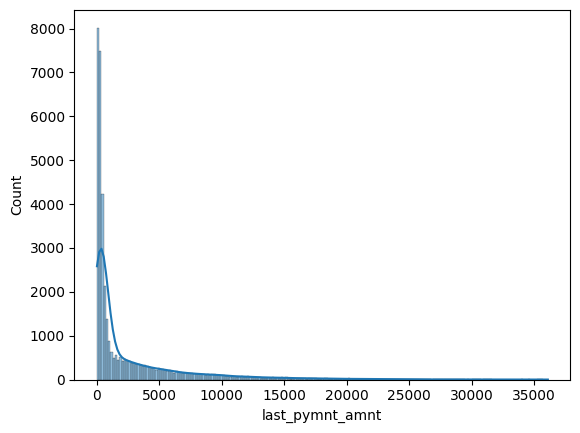

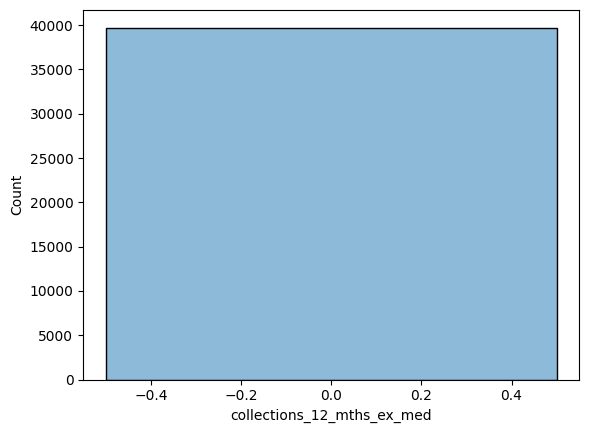

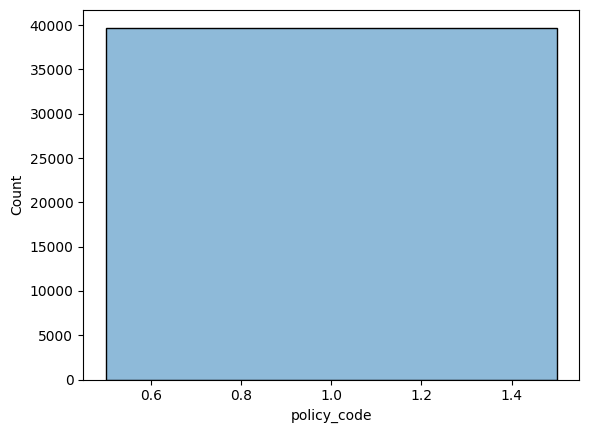

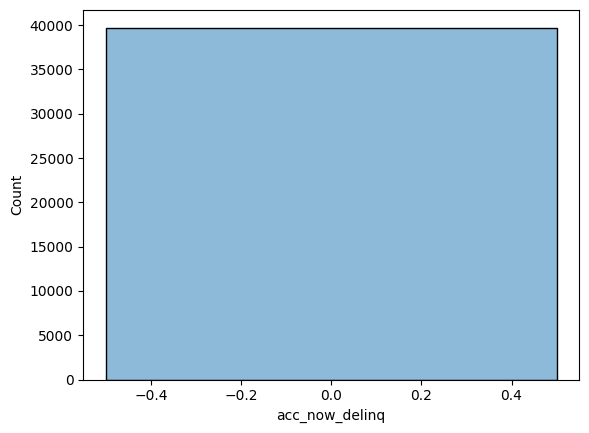

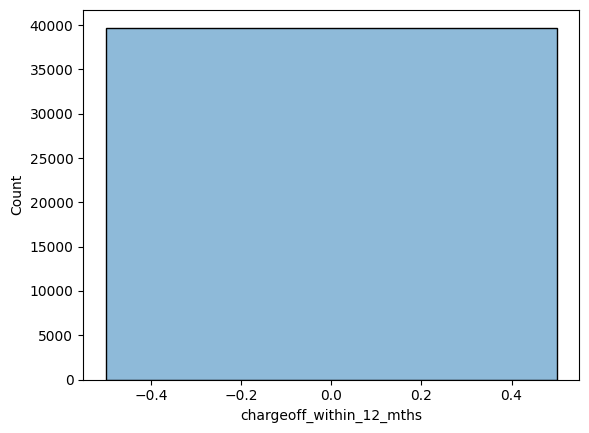

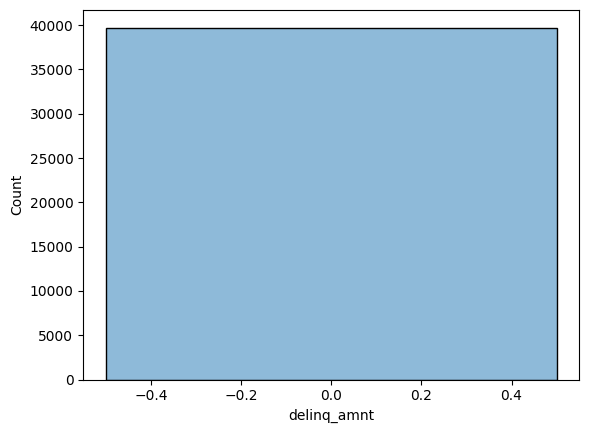

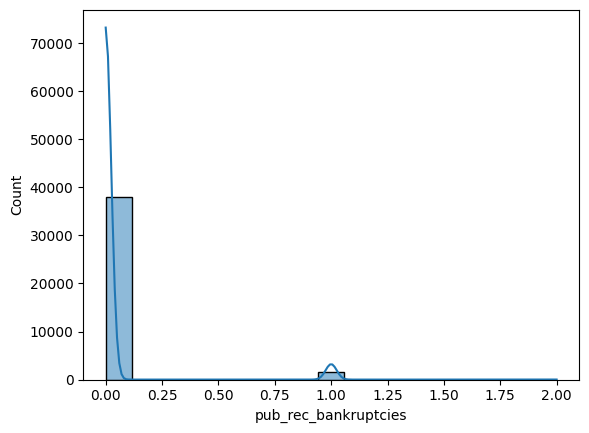

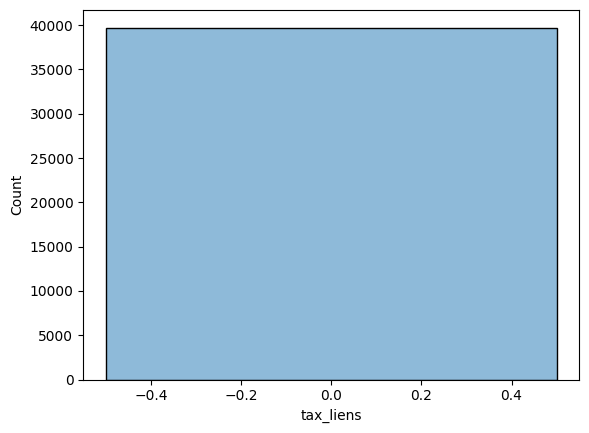

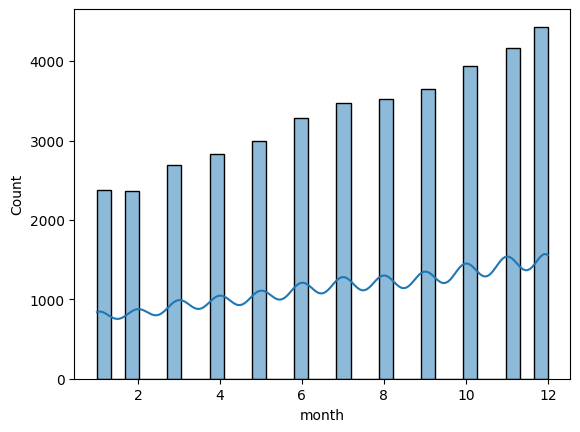

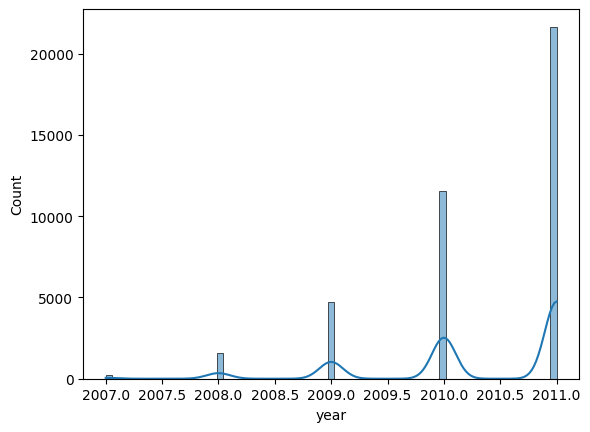

In [22]:
# Plotting HIstogram with kde to get distribution of Dataset
for i in numeric_columns:
    sns.histplot(df[i], kde=True)
    plt.show()

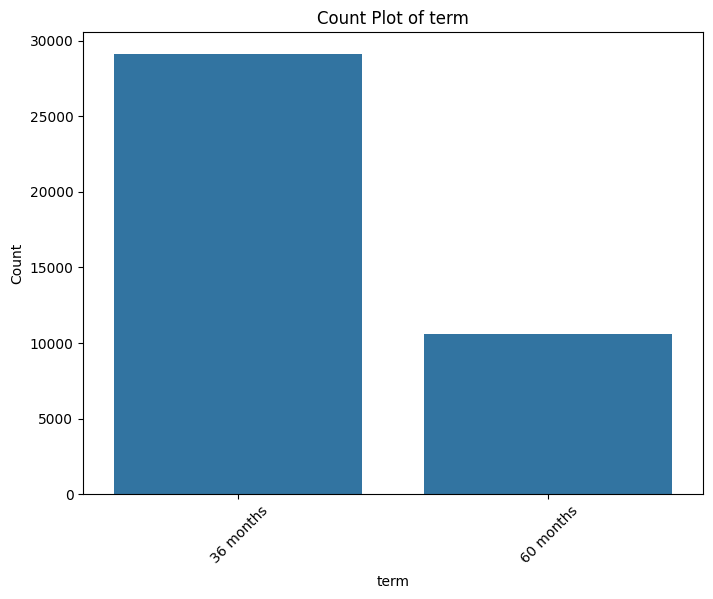

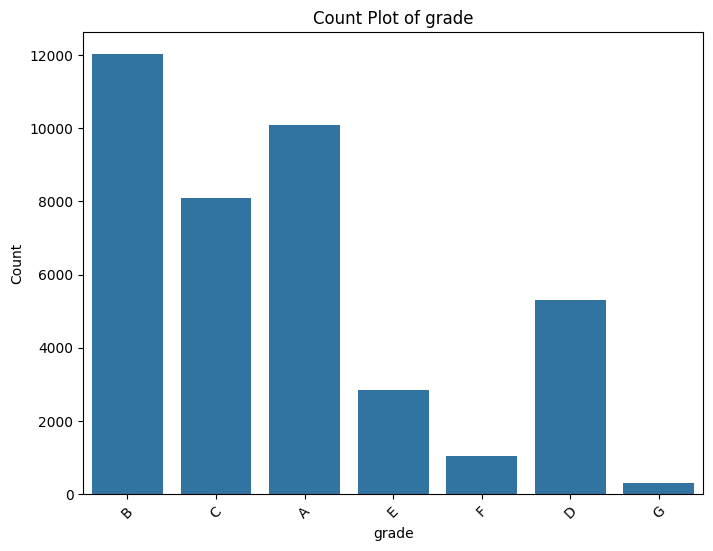

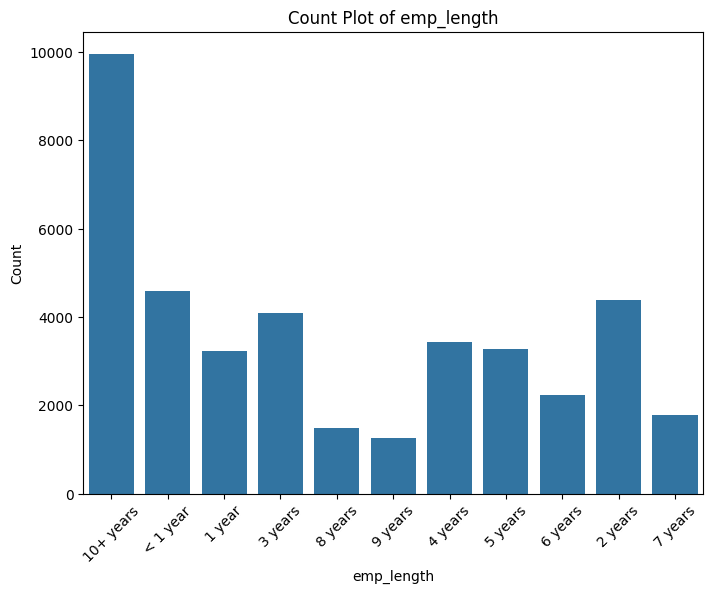

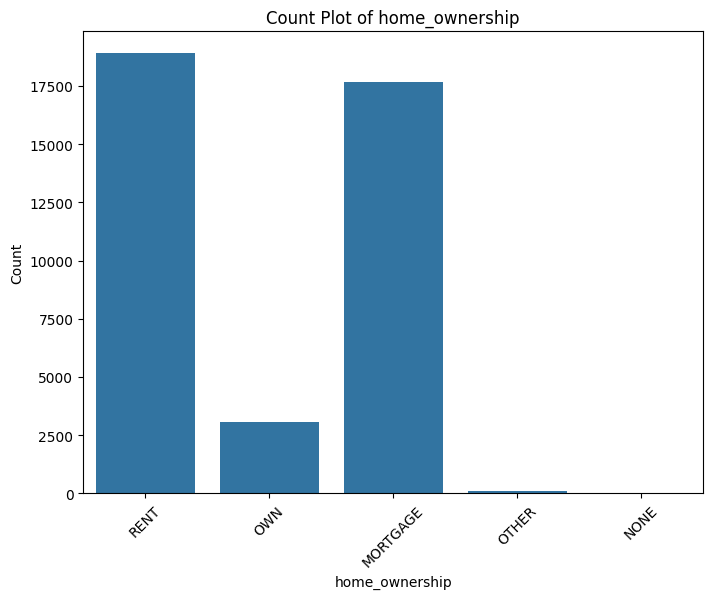

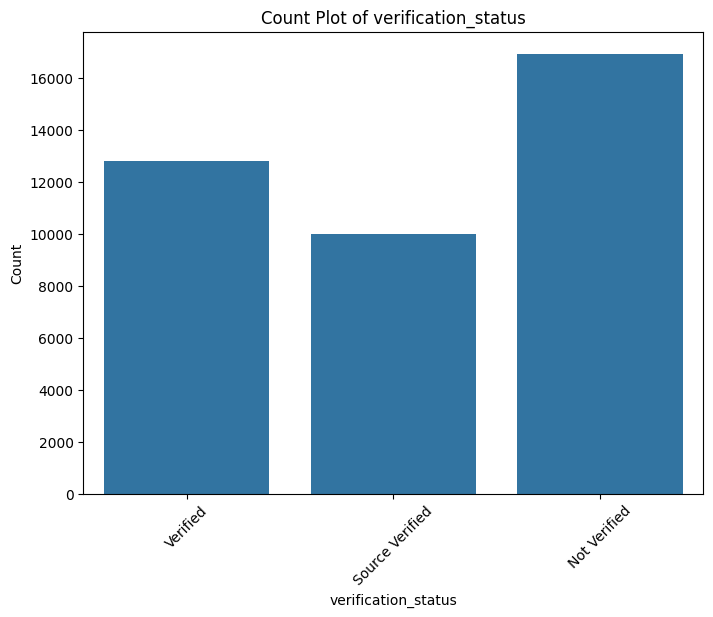

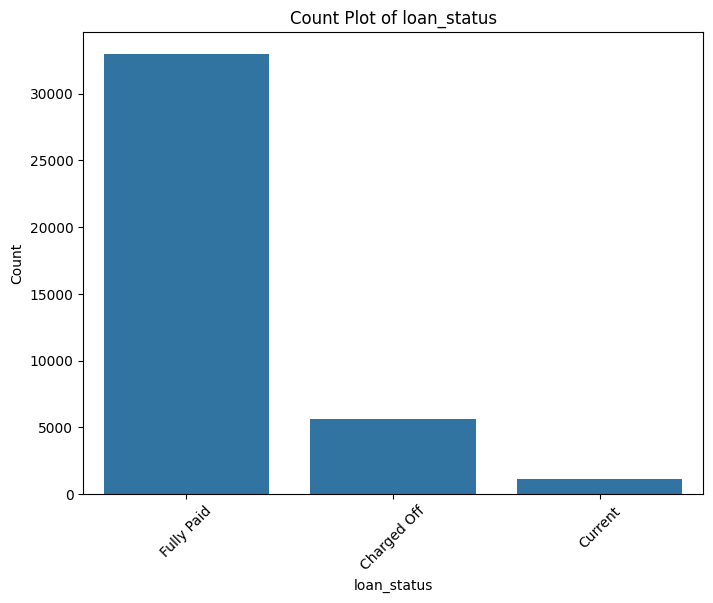

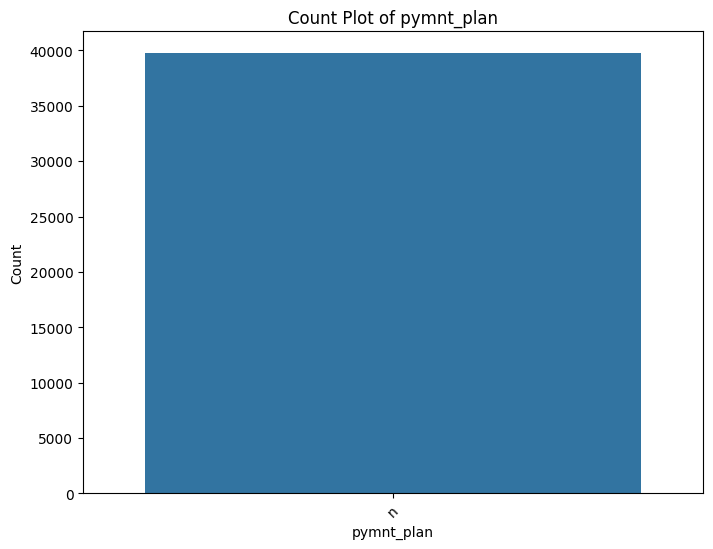

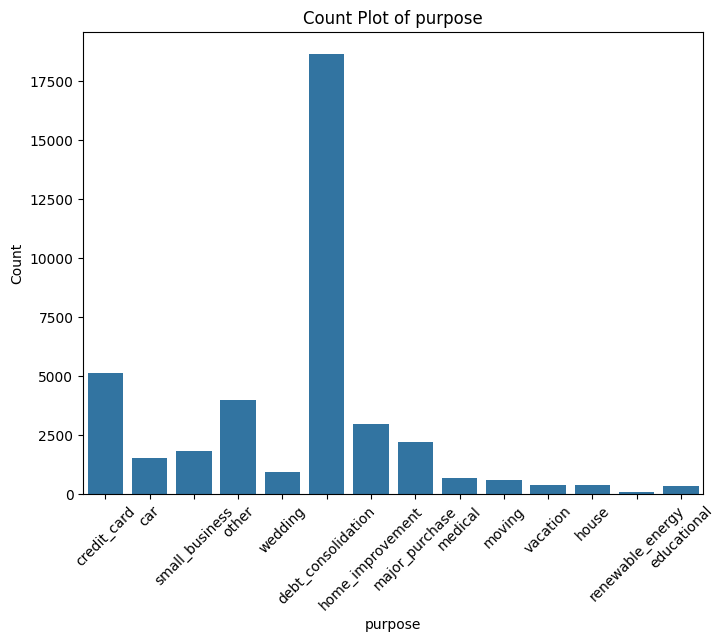

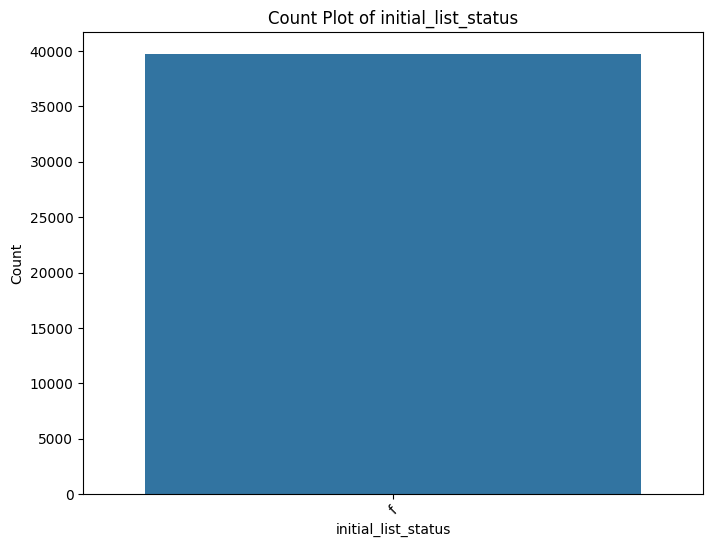

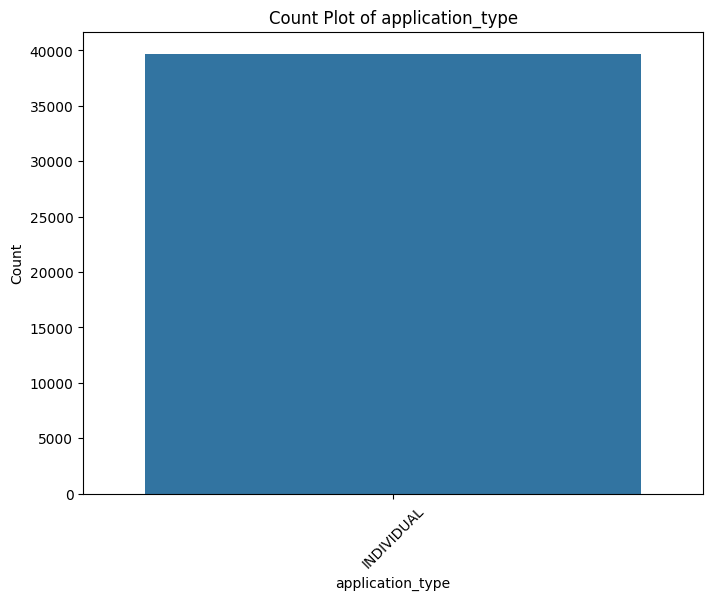

In [24]:
for i in categorical_columns:
    if df[i].nunique()<35:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=i)
        plt.title(f'Count Plot of {i}')
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

In [25]:
# Conclusion from the Countplot Dataset is not balanced

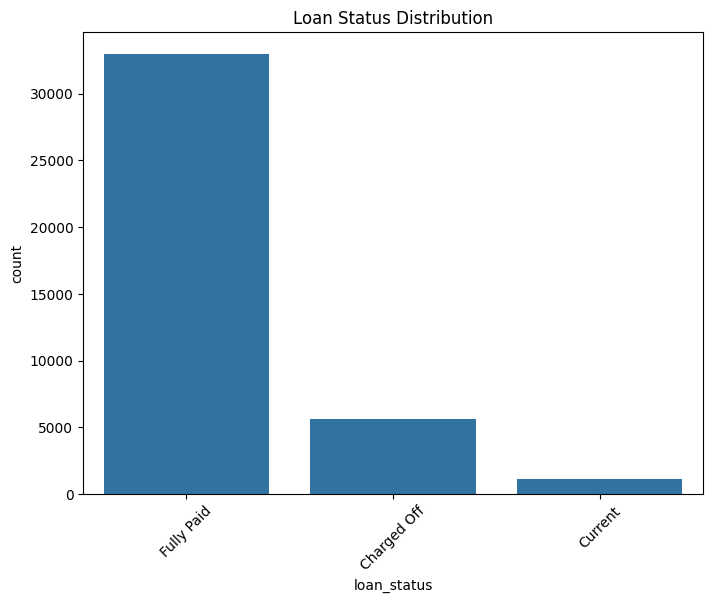

In [26]:
# Visualize the distribution of loan statuses
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan_status')
plt.title('Loan Status Distribution')
plt.xticks(rotation=45)
plt.show()

In [28]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

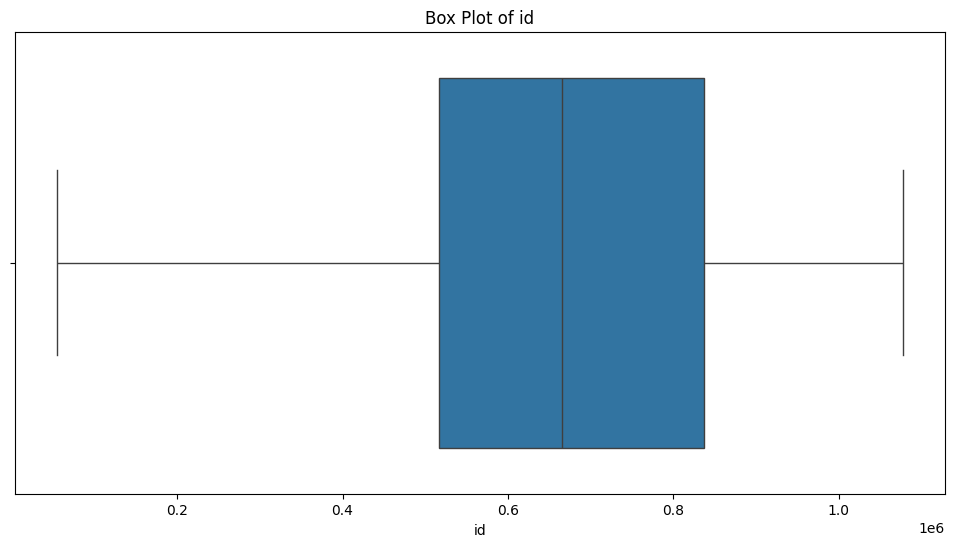

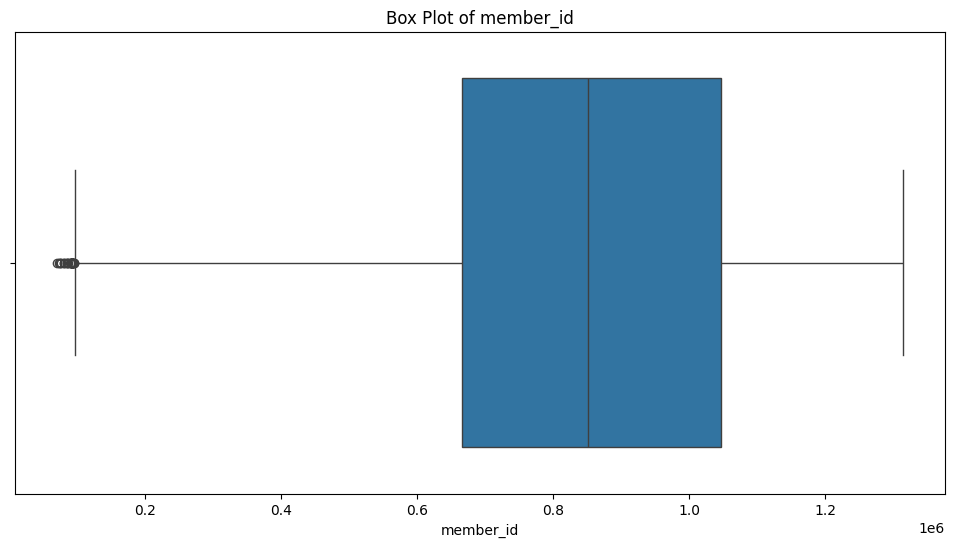

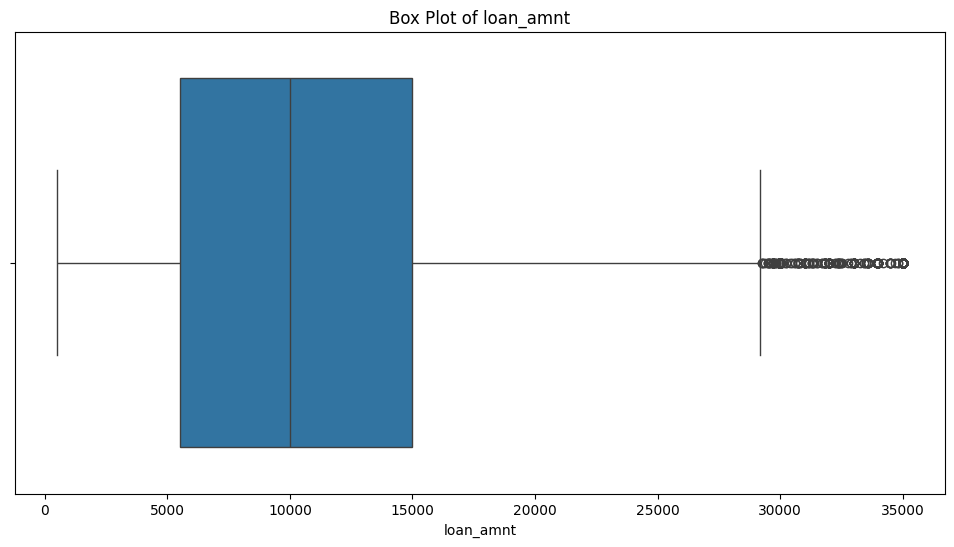

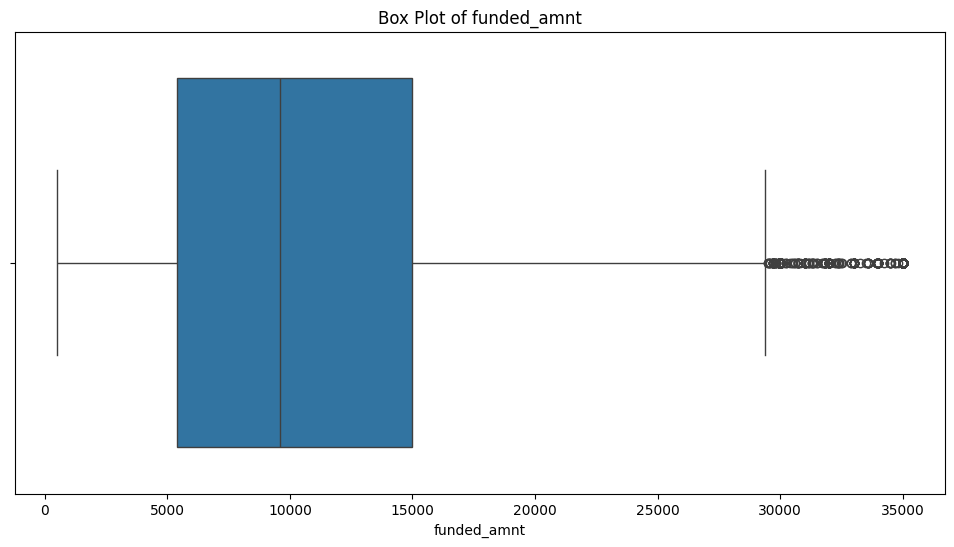

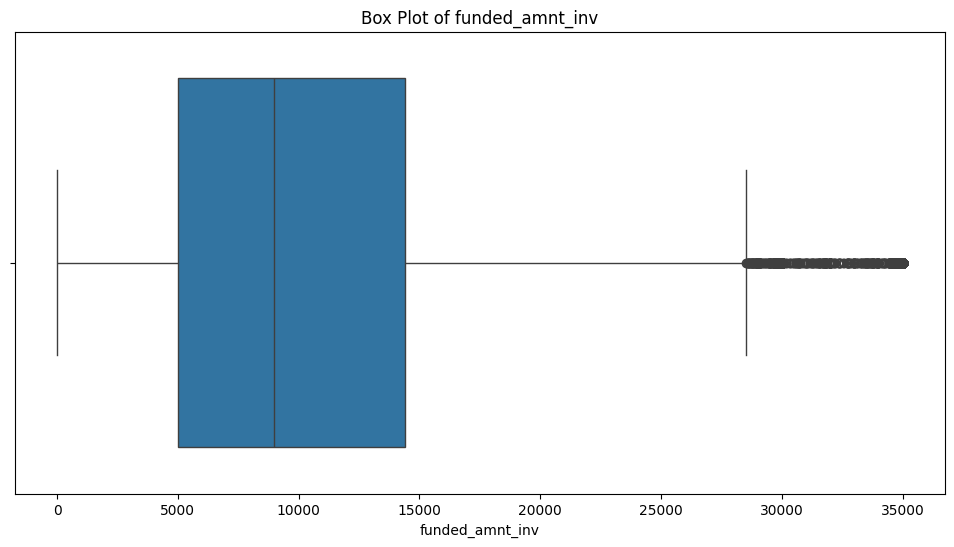

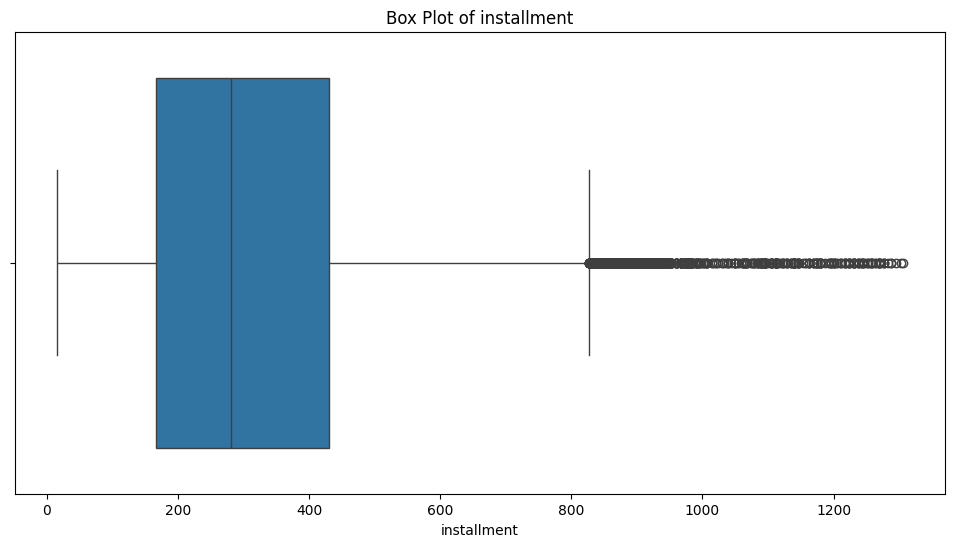

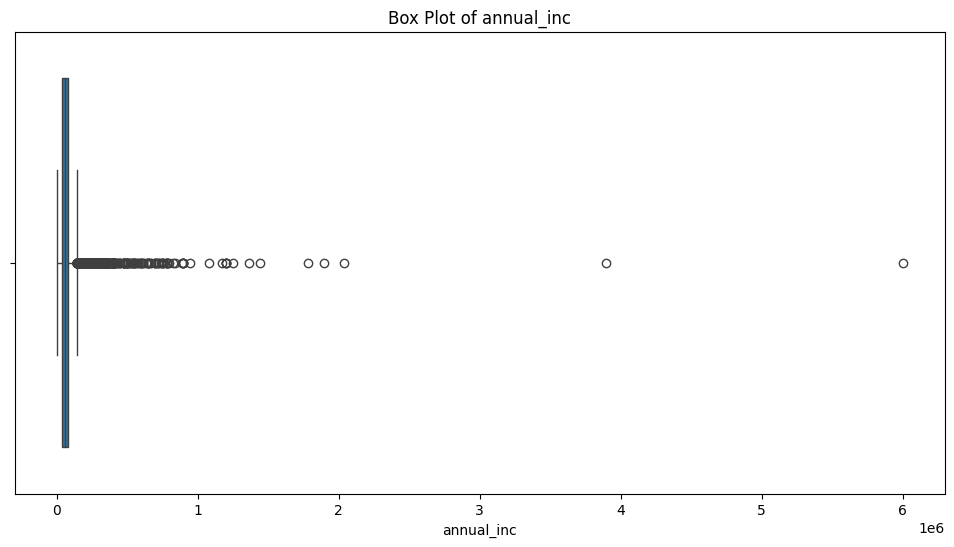

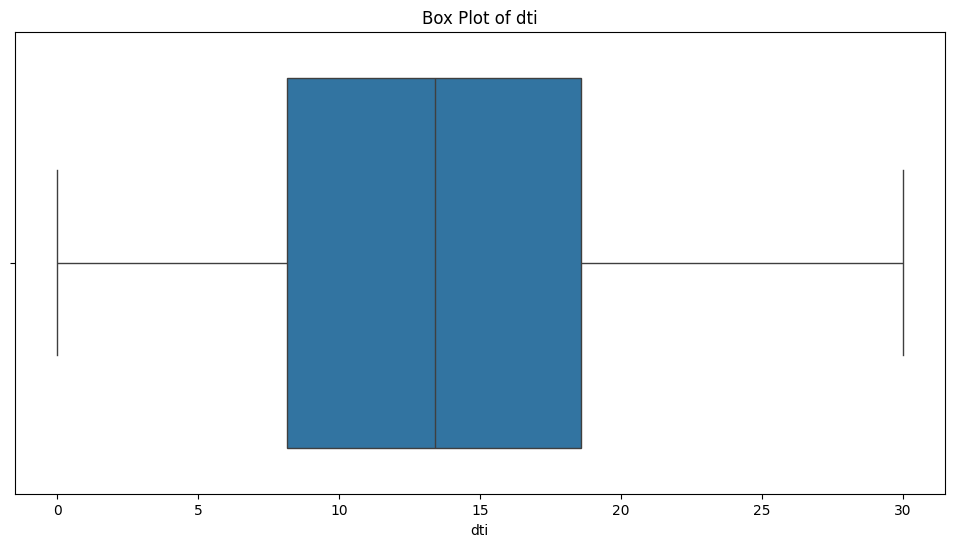

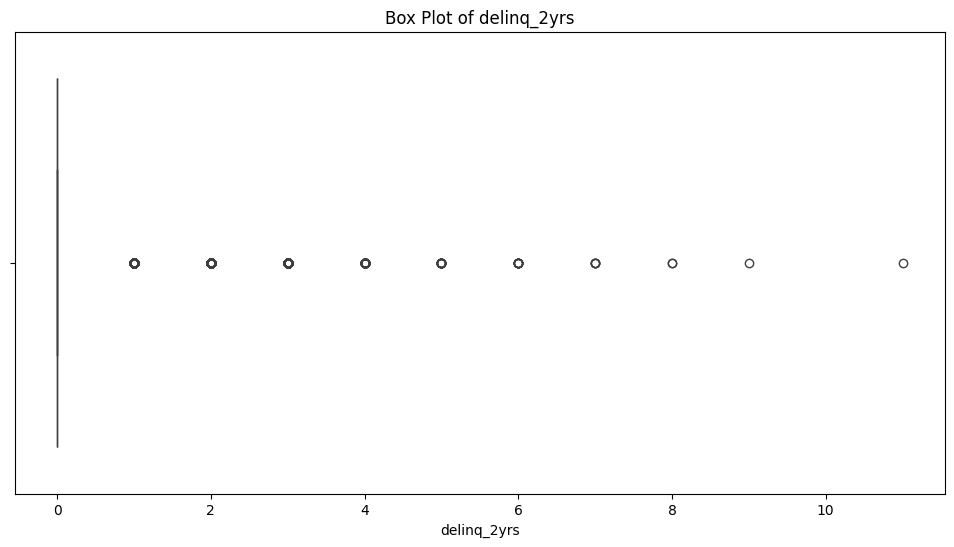

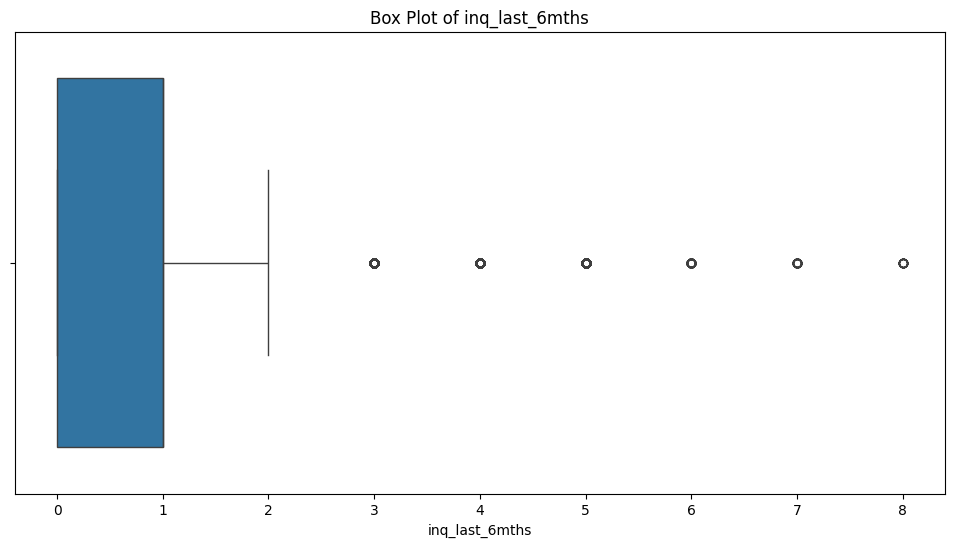

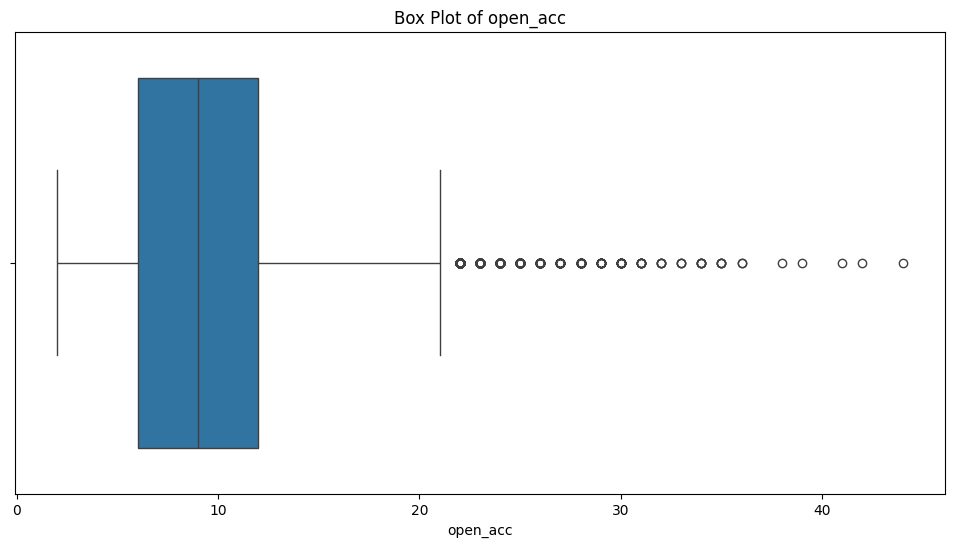

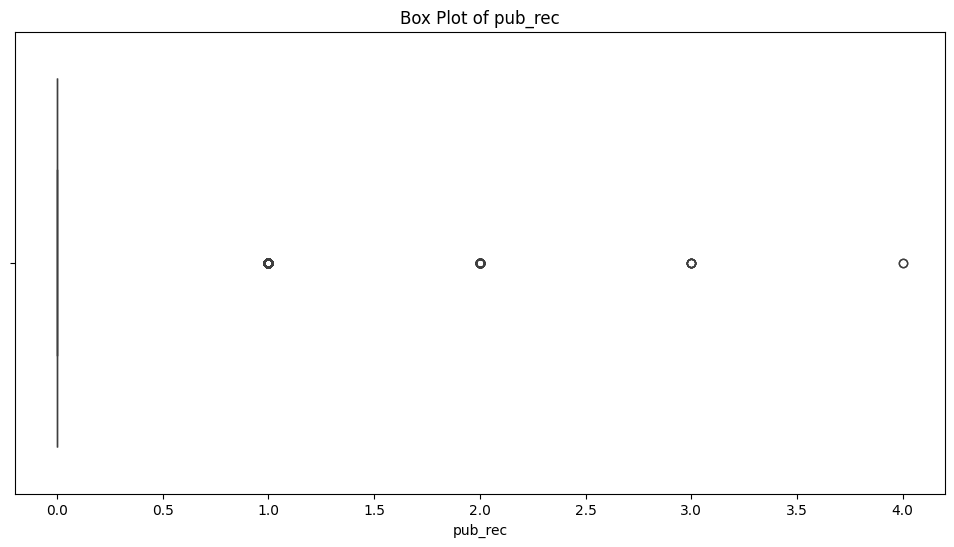

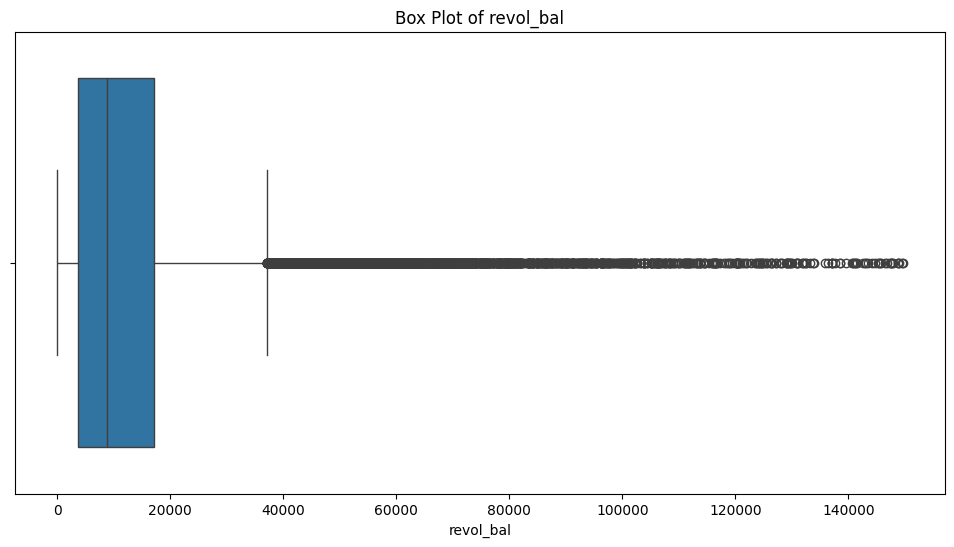

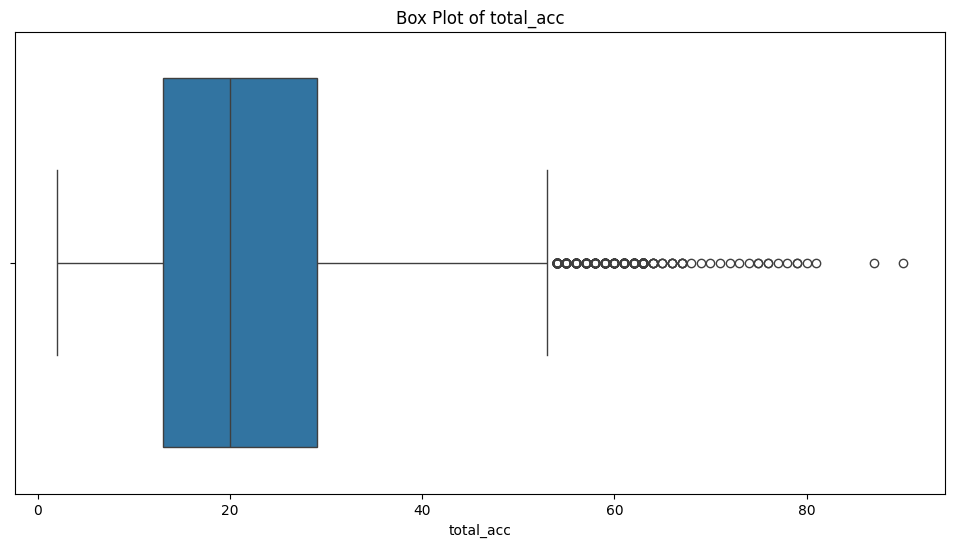

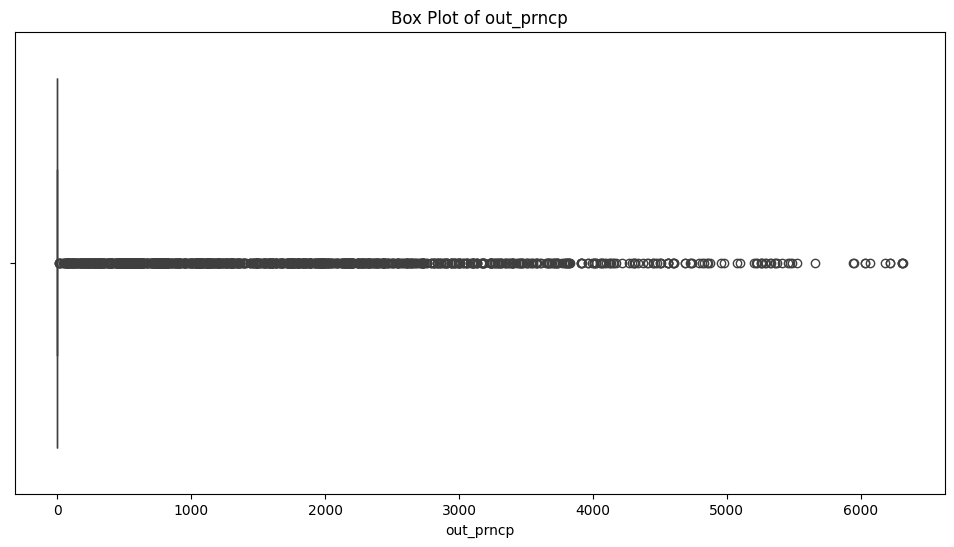

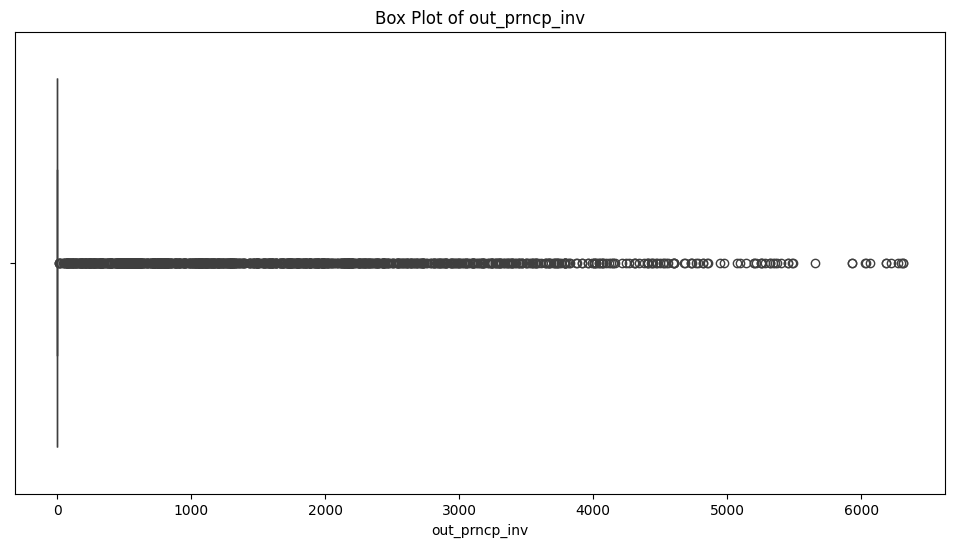

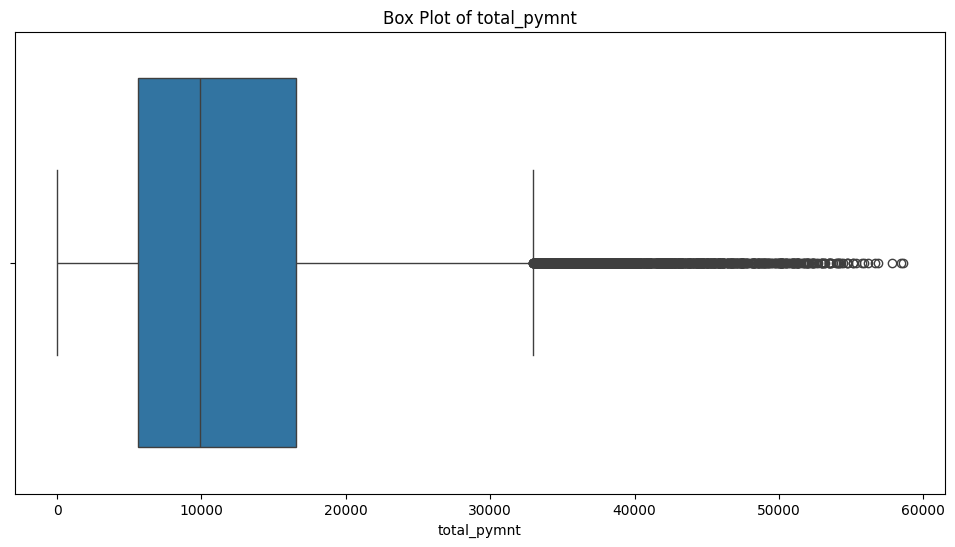

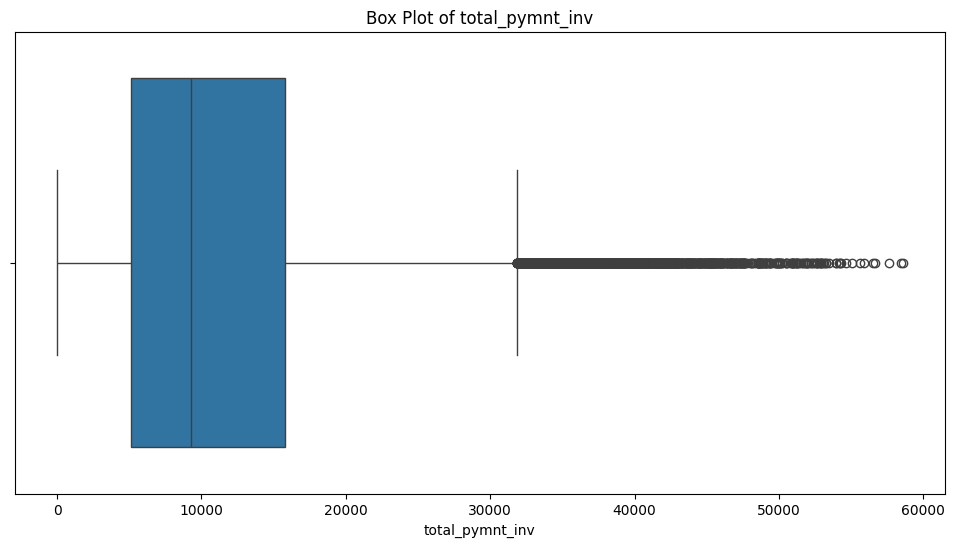

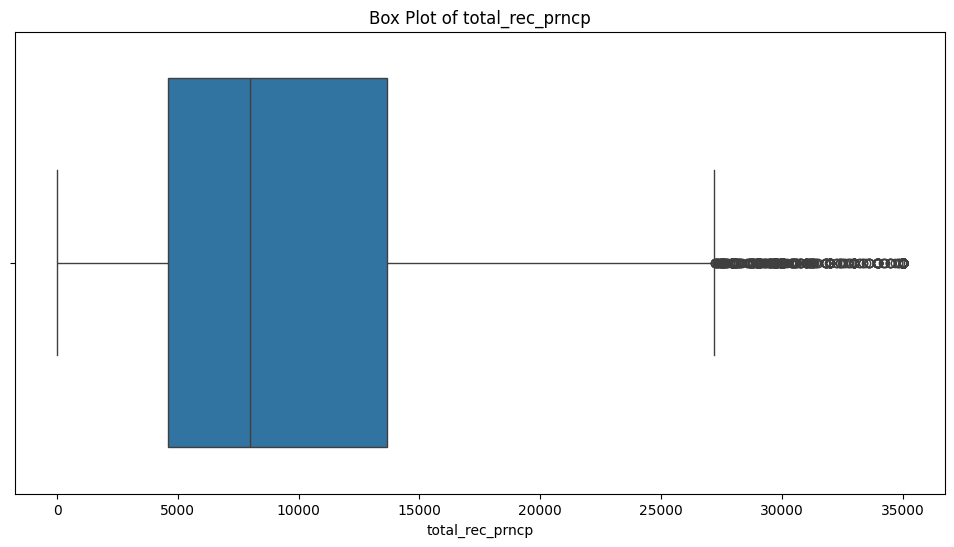

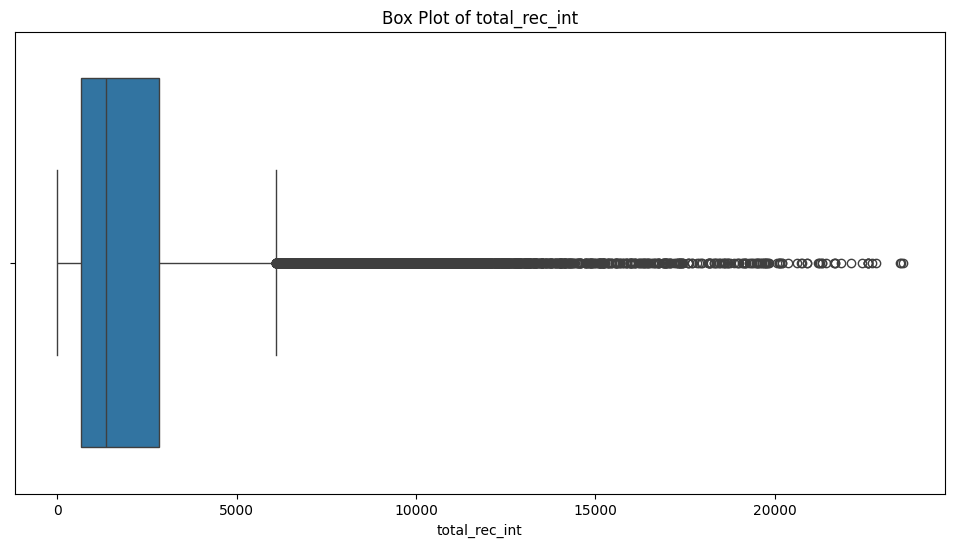

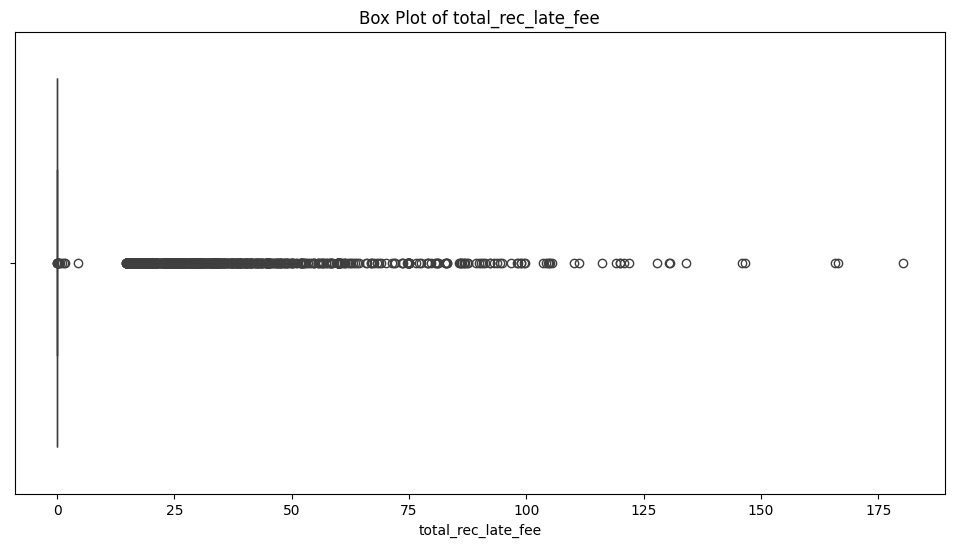

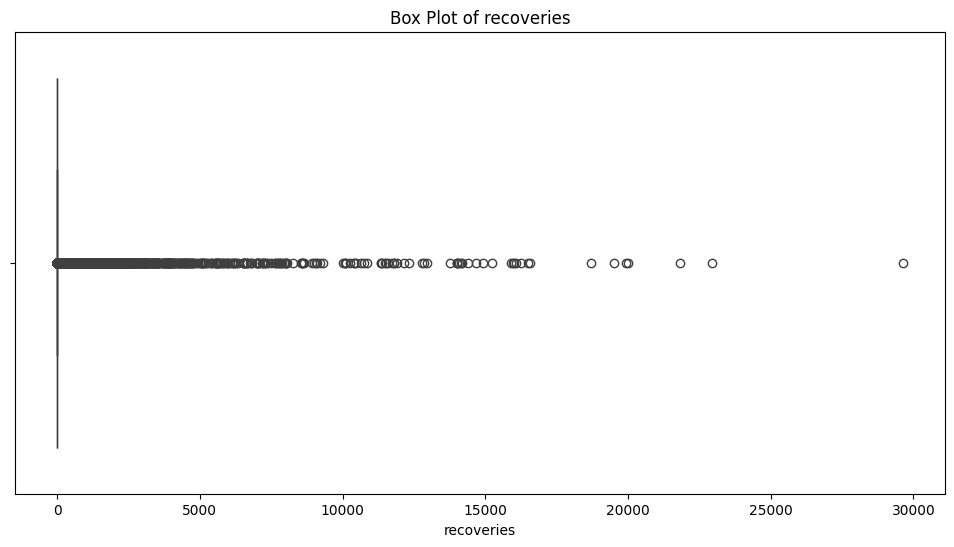

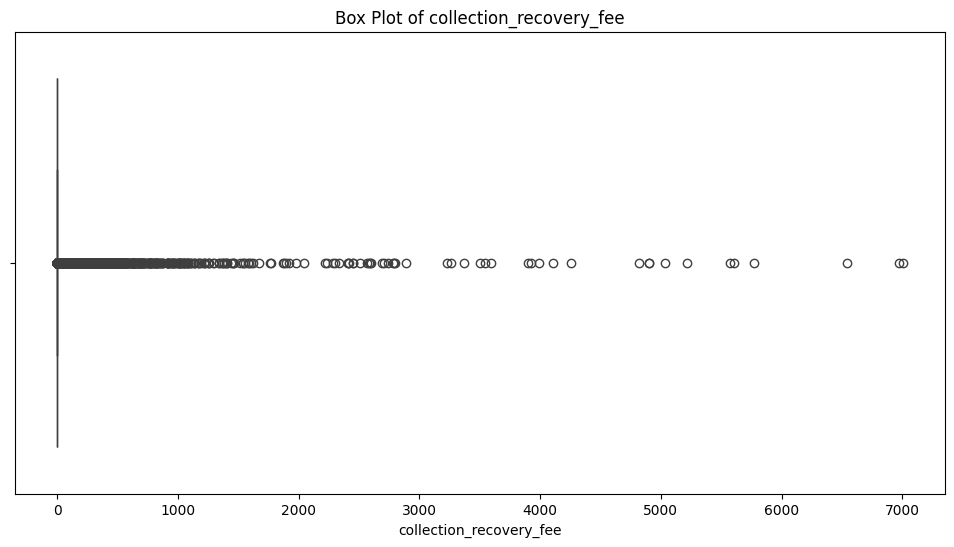

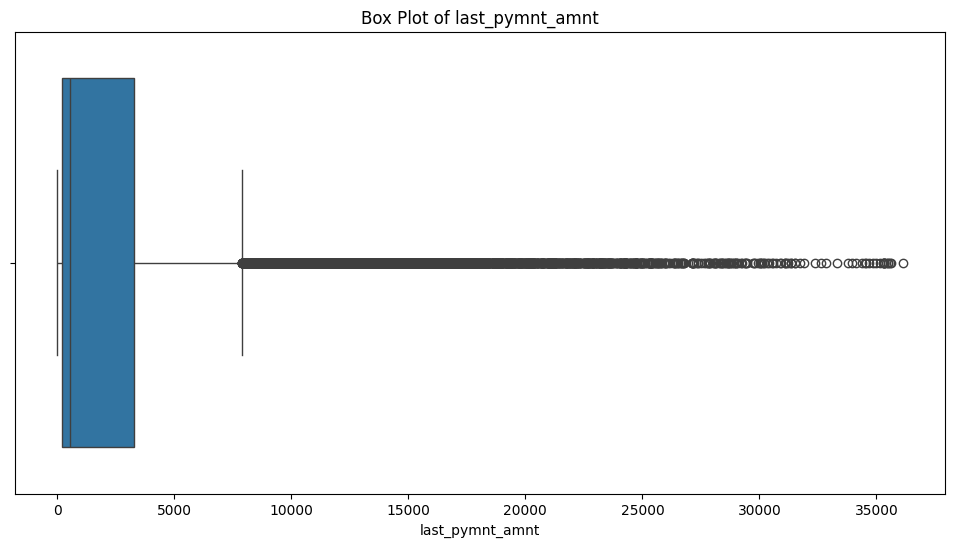

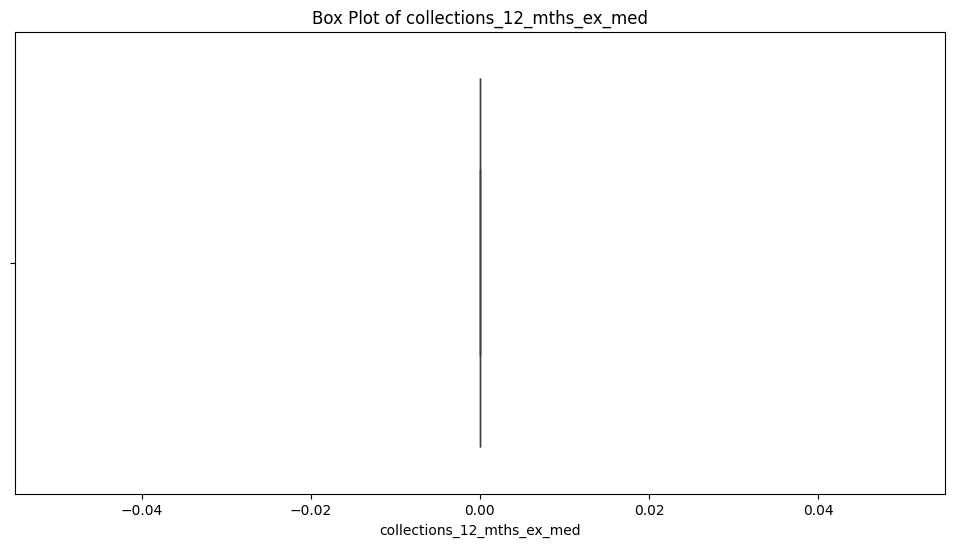

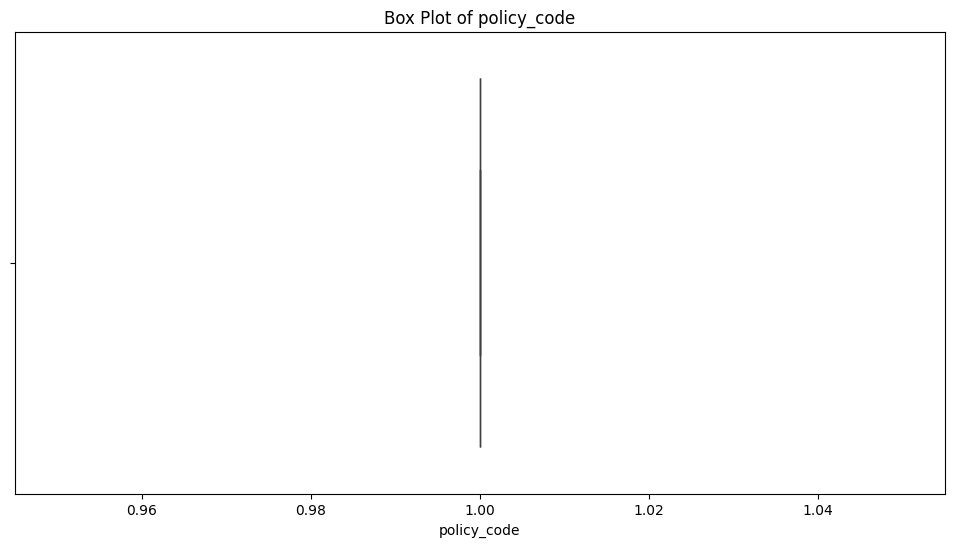

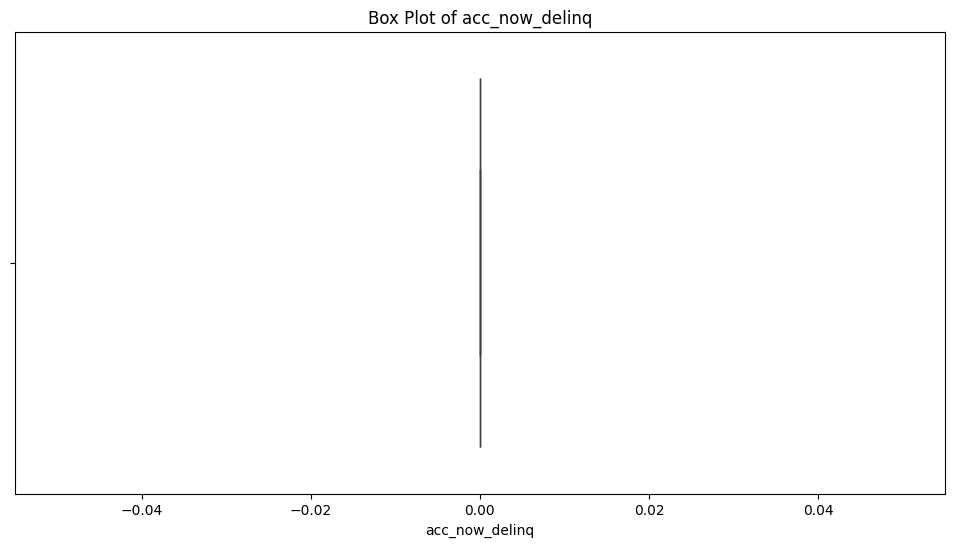

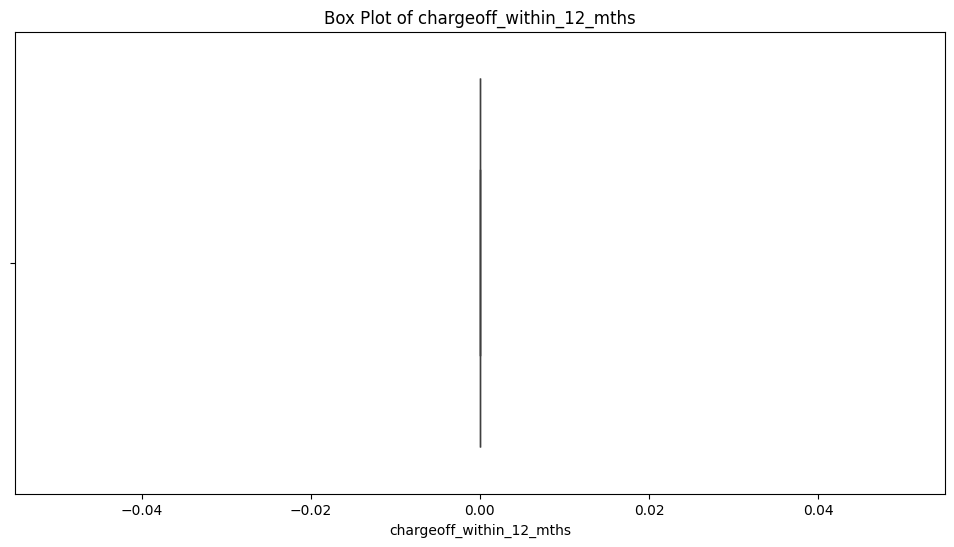

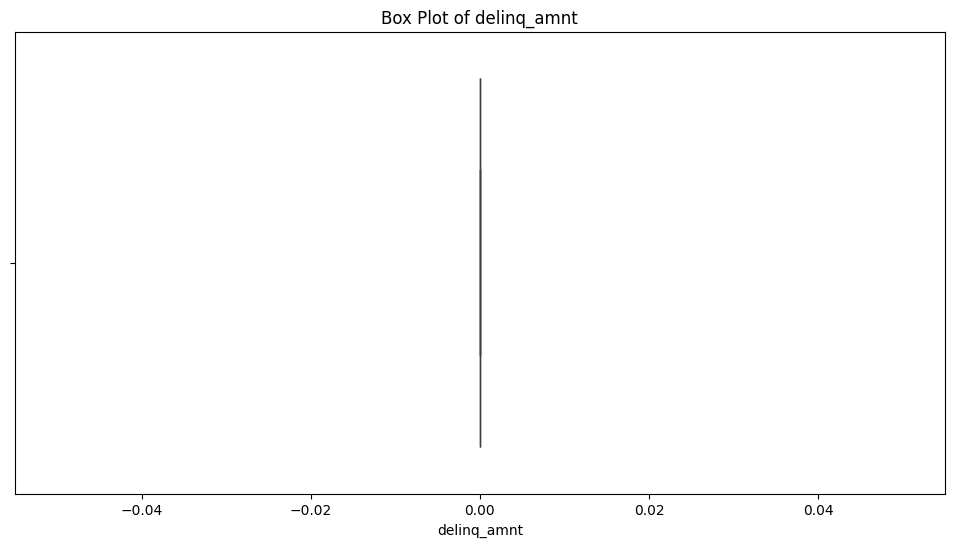

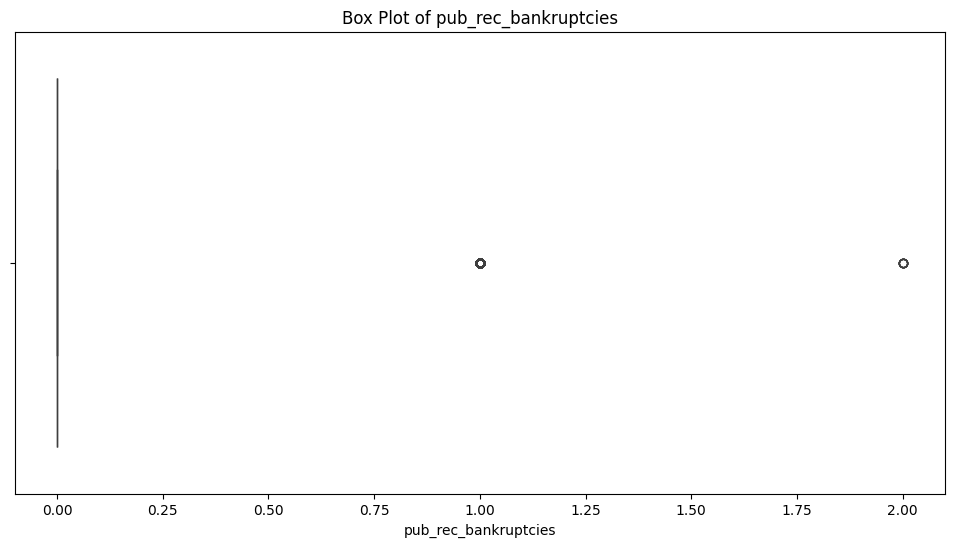

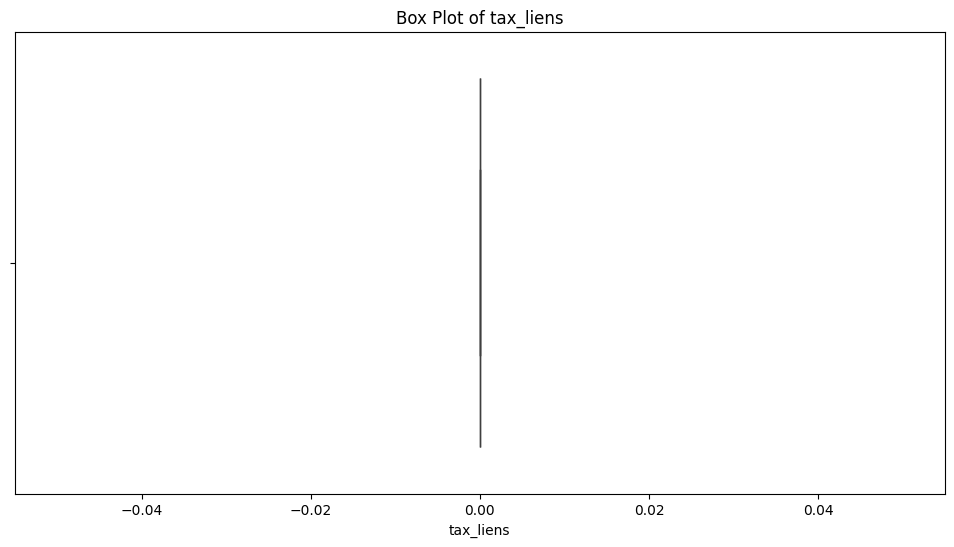

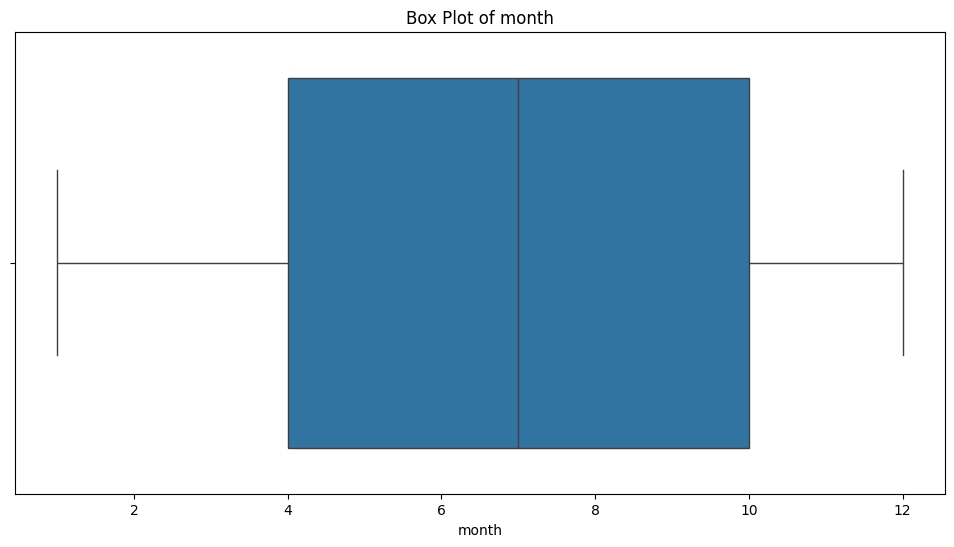

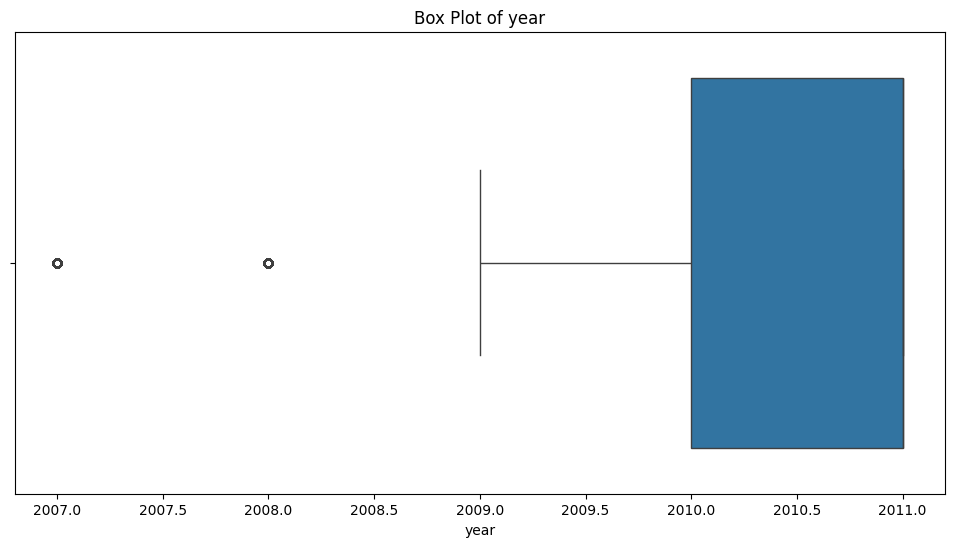

In [29]:
# Drawing boxxplot for the outlier detection
# Set a custom font
plt.rcParams['font.family'] = 'DejaVu Sans'  # Replace 'DejaVu Sans' with a font that supports the missing glyphs

for i in numeric_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=i)
    plt.title(f'Box Plot of {i}')
    plt.show()


In [30]:
# There are many outliers in the Datset columns

In [31]:
df['int_rate'] = df['int_rate'].str.extract(r'(\d+)').astype(int)
df['term'] = df['term'].str.extract('(\d+)').astype(int)

In [32]:
from sklearn.preprocessing import LabelEncoder

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df.drop('loan_status', axis=1)), columns=df.columns.drop('loan_status'))

In [34]:
df_normalized.drop(['id', 'member_id'], inplace=True, axis=1)

In [35]:
from sklearn.model_selection import train_test_split
X = df_normalized
Y = df['loan_status']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

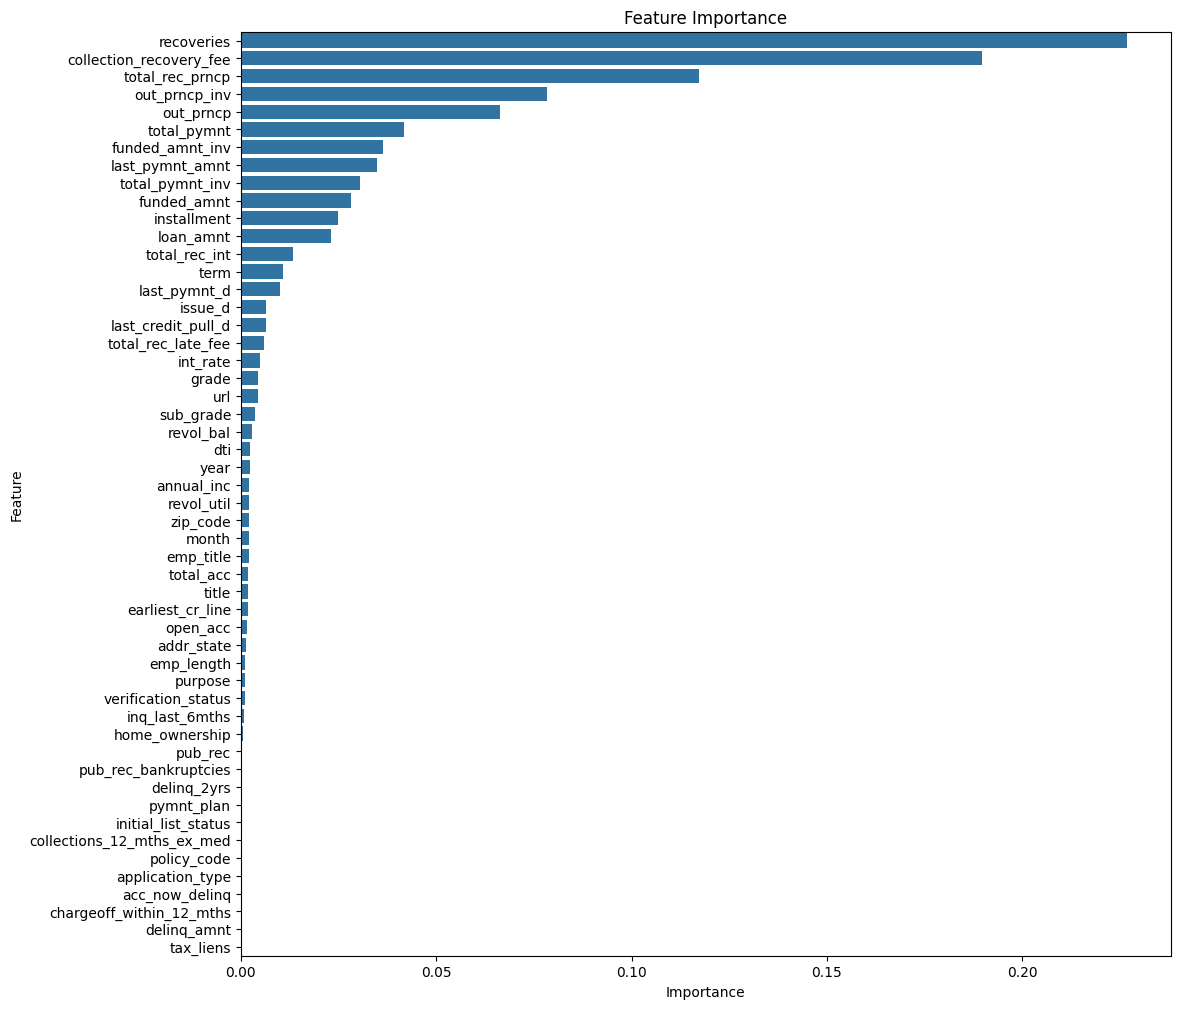

In [36]:
#Feature Importance
# For example, using Random Forest for feature importance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)

rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12, 12))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [37]:
# Above is the list of Importance of feature based on ranking

In [38]:
y_pred=rf.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1661,    0,   53],
       [   0,  342,    0],
       [   0,    0, 9860]], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100} %")

Accuracy: 99.55521987244042 %


# Insights
## 1.Most of the Loan Frequency is in 2011 and least in 2007 and it is increases year by year according to data.
## 2.Most of the features not following the Normal/Gaussian Distribution either they following binaomial distribution, log normal distribution, bernaulli's distribution, uniform distribution and etc.
## 3.From the categorical Column we can say that categories are not balanced and count plot of loan_status (target column) dataset unbalanced.
## 4.From the Box plot we can conclude that there are lot's of outliers in feature.
## 5.From the Random Forest for feature importance plot we can say that recoveries is the most and tax_liens is least important feature to predict the loan status.